<a href="https://colab.research.google.com/github/MacaManda/Olist/blob/main/EDA_2102_con_sellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #Habilitar en colab
!pip install fuzzywuzzy
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np
from collections import Counter

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno

# Expresiones regulares
import re
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from scipy.stats import ttest_ind
import unicodedata
from unidecode import unidecode

import random
import os

import ipywidgets as widgets
# from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# #Habilitar en colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Proyecto final/'
#path = (r"C:\Users\Usuario\Desktop\ACADEMIA\CURSO\PROYECTO FINAL//")

ficheros = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]

dict_datos = {}

for file in ficheros:
    if file.endswith(('.csv')):
        print(file)
        if file.endswith('.csv'):
            df = pd.read_csv(path + file)
        dict_datos[file] = df

df_olist_actualizado_dataset.csv
df_olist_completo_dataset.csv


In [ ]:
nuevo_dict = dict()
for k,v in dict_datos.items():
    k_2 = "_".join(list(k.split ("_"))[1:-1])
    if len(str(k_2))<1: pass
    else:
        k_3= "df_" + k_2
        print (k_3)
        nuevo_dict[k_3] = v

df_olist_actualizado
df_olist_completo


In [ ]:
nuevo_dict.keys()

dict_keys(['df_olist_actualizado', 'df_olist_completo'])

# Funciones

## exploracion inicial


In [ ]:
def exploracion_inicial(df, tipo = None):
    if tipo == 'version_lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuántas filas duplicadas hay?")
        display(df.duplicated().sum())
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include = 'all').fillna(''))
        print('\n########################################################################################')

        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum().sort_values(ascending = False))
        print('\n########################################################################################')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
        print('\n########################################################################################')

## fecha procesada


In [ ]:
def fecha_procesada(df, variable_analisis):
    # Verificamos si hay al menos un valor con hora en la columna
    contiene_hora = df[variable_analisis].astype(str).str.contains(r'\d{2}:\d{2}:\d{2}').any()

    # Aplicamos el formato adecuado según el contenido
    if contiene_hora:
        df[variable_analisis + '_procesada'] = pd.to_datetime(df[variable_analisis], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    else:
        df[variable_analisis + '_procesada'] = pd.to_datetime(df[variable_analisis], format='%Y-%m-%d', errors='coerce')

    # Contar valores nulos después de la conversión
    nulos = df[variable_analisis + '_procesada'].isnull().sum()
    print(f"Número de valores nulos en '{variable_analisis}_procesada': {nulos}")

    # Sustituimos la columna original y eliminamos la auxiliar
    df[variable_analisis] = df[variable_analisis + '_procesada']
    df.drop(columns=[variable_analisis + '_procesada'], inplace=True)


## gráfico por ciudades

In [ ]:
def plot_grouped_bars(df):
    # Agrupar por ciudad y calcular las métricas
    city_state_summary = df.groupby(['customer_city_procesada']).agg(
        customer_count=('customer_unique_id', 'nunique'),
        order_count=('order_id', 'nunique')
    ).sort_values(by=['customer_count', 'order_count'], ascending=False).head(20)

    # Restablecer índice para facilitar la visualización
    city_state_summary.reset_index(inplace=True)

    # Crear una nueva columna para identificar las métricas
    city_state_summary = city_state_summary.melt(id_vars=['customer_city_procesada'],
                                                 value_vars=['customer_count', 'order_count'],
                                                 var_name='metric', value_name='value')

    # Configurar la figura
    plt.figure(figsize=(14, 8))

    # Gráfico de barras agrupadas
    sns.barplot(x='customer_city_procesada', y='value', hue='metric', data=city_state_summary, dodge=True)

    # Personalizar la apariencia
    plt.title('Top 20: Número de Clientes y Pedidos por Ciudad')
    plt.xlabel('Ciudad')
    plt.ylabel('Número')
    plt.xticks(rotation=90)
    plt.legend(title='Métricas')

    # Ajuste del layout
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_total_payment_value(df):
    # Agrupar por ciudad y estado y calcular la suma del valor total de pagos
    city_state_summary = df.groupby(['customer_city_procesada']).agg(
        total_payment_value=('payment_value', 'sum')
    ).sort_values(by='total_payment_value', ascending=False).head(20)

    # Restablecer índice para facilitar la visualización
    city_state_summary.reset_index(inplace=True)

    # Configurar la figura
    plt.figure(figsize=(14, 8))

    # Gráfico de barras para total_payment_value
    sns.barplot(x='customer_city_procesada', y='total_payment_value', data=city_state_summary, color='green')

    # Personalizar la apariencia
    plt.title('Top 20: Valor Total de Pagos por Ciudad')
    plt.xlabel('Ciudad')
    plt.ylabel('Valor Total de Pagos')
    plt.xticks(rotation=90)

    # Ajuste del layout
    plt.tight_layout()
    plt.show()


# Dataset

In [ ]:
df_olist_actualizado = nuevo_dict['df_olist_actualizado']

In [ ]:
exploracion_inicial(df_olist_actualizado)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 115,021 filas y 41 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_city_procesada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,maua
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,maua
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,maua
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,belo horizonte
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,guariba



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_city_procesada
115016,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,828.0,4.0,4950.0,40.0,10.0,40.0,17602,tupa,SP,tupa
115017,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,500.0,2.0,13300.0,32.0,90.0,22.0,8290,sao paulo,SP,sao paulo
115018,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,ilicinea
115019,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,ilicinea
115020,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,83750,...,569.0,1.0,150.0,16.0,7.0,15.0,14407,franca,SP,franca



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_city_procesada
29470,d701dc60f61795a62070fa2494b6691a,5c87184371002d49e08b9ac10eb96647,delivered,2018-01-05 19:15:37,2018-01-05 19:27:42,2018-01-08 18:17:05,2018-01-16 20:58:52,2018-02-07,86bfc49565a9ca52fcbf861fcc1e67a4,24220,...,207.0,4.0,150.0,16.0,2.0,11.0,38408,uberlandia,MG,uberlandia
77631,5c12f254446ca6ab5edd195f6ca79d22,754132cb2b8ef289dba4b60de444ff96,delivered,2018-06-02 19:26:59,2018-06-05 04:52:03,2018-06-05 14:47:00,2018-06-22 13:52:28,2018-07-17,15047575a9fb9ace7a7e7e201e4a5acd,88925,...,1786.0,2.0,500.0,68.0,8.0,13.0,13076,campinas,SP,campinas
46368,3acdc95f43a4fb6a00019abc9e3bfe28,5c263ddb1e0e538b037e9bd59f0b054f,delivered,2018-02-06 15:43:43,2018-02-06 16:11:41,2018-02-07 19:43:26,2018-02-21 20:37:45,2018-03-05,ead5c6583870460b0b2923a707ea263d,72410,...,621.0,2.0,363.0,16.0,4.0,11.0,9780,sao bernardo do campo,SP,sao bernardo do campo
71005,9e22b00fd1b9f036577e8c517ea0a5d4,5a7346263920ecab0f88da703bbaf3b1,delivered,2017-12-01 13:45:30,2017-12-03 13:52:24,2017-12-04 21:22:58,2018-01-03 21:36:42,2017-12-27,0fb360a422d2297dcf21d4d7b91028db,22793,...,903.0,6.0,2600.0,50.0,10.0,30.0,4782,sao paulo,SP,sao paulo
59533,3363e330c754a732795f39079bb76d55,235702411e5214f0e4a0761bf5ce9e99,delivered,2018-01-10 12:06:09,2018-01-10 12:17:33,2018-01-11 17:10:33,2018-01-26 16:38:42,2018-02-08,9fc089b0b6a8db40d4357e784f1e91d4,99965,...,450.0,1.0,9000.0,42.0,12.0,39.0,29156,cariacica,ES,cariacica



########################################################################################
¿Cuántas filas duplicadas hay?


0


########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - customer_id
	 - order_status
	 - order_purchase_timestamp
	 - order_approved_at
	 - order_delivered_carrier_date
	 - order_delivered_customer_date
	 - order_estimated_delivery_date
	 - customer_unique_id
	 - customer_zip_code_prefix
	 - customer_city
	 - customer_state
	 - customer_city_procesada
	 - order_item_id
	 - product_id
	 - seller_id
	 - shipping_limit_date
	 - price
	 - freight_value
	 - payment_sequential
	 - payment_type
	 - payment_installments
	 - payment_value
	 - review_id
	 - review_score
	 - review_comment_title
	 - review_comment_message
	 - review_creation_date
	 - review_answer_timestamp
	 - product_category_name
	 - product_name_lenght
	 - product_description_lenght
	 - product_photos_qty
	 - product_weight_g
	 - product_length_cm
	 - product_height_cm
	 - product_width_cm
	 - seller_zip_code_prefix
	 - seller_c

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_city_procesada
count,115021,115021,115021,115021,115021,115021,115021,115021,115021,115021.0,...,113394.0,113394.0,115001.0,115001.0,115001.0,115001.0,115021.0,115021,115021,115021
unique,96461,96461,2,95939,88272,80100,95649,445,93342,,...,,,,,,,,595,22,569
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20,9a736b248f67d166d2fbb006bcb877c3,,...,,,,,,,,sao paulo,SP,sao paulo
freq,63,63,115014,63,63,63,63,640,75,,...,,,,,,,,28511,82044,28497
mean,,,,,,,,,,35081.074908,...,785.800377,2.20935,2107.533639,30.230041,16.590882,23.058391,24453.845602,,,
std,,,,,,,,,,29851.321681,...,650.976146,1.720275,3774.256317,16.128151,13.427247,11.731553,27586.944698,,,
min,,,,,,,,,,1003.0,...,4.0,1.0,0.0,7.0,2.0,6.0,1001.0,,,
25%,,,,,,,,,,11310.0,...,346.0,1.0,300.0,18.0,8.0,15.0,6429.0,,,
50%,,,,,,,,,,24320.0,...,601.0,1.0,700.0,25.0,13.0,20.0,13660.0,,,
75%,,,,,,,,,,58801.0,...,985.0,3.0,1800.0,38.0,20.0,30.0,28035.0,,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
review_comment_title             101460
review_comment_message            67193
product_description_lenght         1627
product_photos_qty                 1627
product_name_lenght                1627
review_creation_date                861
review_id                           861
review_score                        861
review_answer_timestamp             861
product_width_cm                     20
product_height_cm                    20
product_length_cm                    20
product_weight_g                     20
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
product_category_name                 0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0
order_id                  

In [ ]:
columnas_seleccionadas = [
    "order_id", "order_status", "order_purchase_timestamp", "order_approved_at",
    "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date",
    "customer_unique_id", "customer_state", "order_item_id",
    "product_id", "seller_id", "shipping_limit_date", "price", "freight_value",
    "payment_sequential", "payment_type", "payment_installments", "payment_value",
    "review_score", "product_category_name", "seller_state"]

df= df_olist_actualizado[columnas_seleccionadas]

In [ ]:
exploracion_inicial(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 115,021 filas y 22 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,...,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,1,...,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,housewares,SP
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,1,...,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,4.0,housewares,SP
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,1,...,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,4.0,housewares,SP
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,BA,1,...,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,4.0,perfumery,SP
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,GO,1,...,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,auto,SP



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,...,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,seller_state
115016,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,SP,1,...,2018-02-12 13:10:37,174.90,20.10,1.0,credit_card,3.0,195.00,4.0,baby,SP
115017,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,BA,1,...,2017-09-05 15:04:16,205.99,65.02,1.0,credit_card,5.0,271.01,5.0,home_appliances_2,SP
115018,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,1,...,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16,2.0,computers_accessories,MG
115019,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,RJ,2,...,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16,2.0,computers_accessories,MG
115020,66dea50a8b16d9b4dee7af250b4be1a5,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,PR,1,...,2018-03-15 10:55:42,68.50,18.36,1.0,debit_card,1.0,86.86,5.0,health_beauty,SP



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,...,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,seller_state
22579,848ab881c02107858764faed825d804b,delivered,2018-03-20 20:37:45,2018-03-20 20:50:43,2018-03-23 17:14:34,2018-04-19 00:56:34,2018-04-09,a82301b543c924e58739adcb64ac52b1,ES,1,...,2018-03-26 20:50:43,169.9,20.71,1.0,credit_card,2.0,381.22,1.0,sports_leisure,SP
96797,cddedff311702945e9c62236026dc3dc,delivered,2017-04-04 19:19:11,2017-04-04 19:30:17,2017-04-05 13:34:52,2017-04-07 11:19:42,2017-04-26,4e1b18809b98d358415a6aa0e4a8b84b,SP,1,...,2017-04-11 19:30:17,158.0,13.69,1.0,credit_card,1.0,171.69,5.0,sports_leisure,SP
36799,4b8e7877b3a106b2df0a75470a397339,delivered,2018-04-03 09:47:49,2018-04-04 03:29:24,2018-04-05 23:49:22,2018-04-11 23:48:36,2018-04-19,ea49316c401c7f02e029bf312edacf41,SP,1,...,2018-04-10 03:29:24,99.9,13.14,1.0,boleto,1.0,113.04,4.0,baby,SP
28642,76efb2fbb5b0e732ba6c77c63d263b59,delivered,2017-03-23 16:38:33,2017-03-23 16:50:17,2017-03-24 14:03:04,2017-03-30 13:08:13,2017-04-18,c3aac0f3675a314a924cb484549447c5,DF,1,...,2017-03-29 16:50:17,143.8,25.77,1.0,credit_card,9.0,443.17,5.0,auto,SP
103354,8a667bf7baec5286ad76d81facdc85e5,delivered,2017-08-29 14:39:21,2017-08-29 14:50:16,2017-08-29 20:17:36,2017-09-05 21:47:56,2017-09-18,62a25a159f9fd2ab7c882d9407f49aa9,SP,1,...,2017-09-05 14:50:16,179.9,13.60,1.0,credit_card,2.0,193.50,5.0,sports_leisure,SP



########################################################################################
¿Cuántas filas duplicadas hay?


0


########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - order_status
	 - order_purchase_timestamp
	 - order_approved_at
	 - order_delivered_carrier_date
	 - order_delivered_customer_date
	 - order_estimated_delivery_date
	 - customer_unique_id
	 - customer_state
	 - order_item_id
	 - product_id
	 - seller_id
	 - shipping_limit_date
	 - price
	 - freight_value
	 - payment_sequential
	 - payment_type
	 - payment_installments
	 - payment_value
	 - review_score
	 - product_category_name
	 - seller_state

########################################################################################
¿Cuál es el tipo de datos de cada columna?
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_d

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,...,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,seller_state
count,115021,115021,115021,115021,115021,115021,115021,115021,115021,115021.0,...,115021,115021.0,115021.0,115018.0,115018,115018.0,115018.0,114160.0,115021,115021
unique,96461,2,95939,88272,80100,95649,445,93342,27,,...,91327,,,,4,,,,74,22
top,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20,9a736b248f67d166d2fbb006bcb877c3,SP,,...,2017-08-14 20:43:31,,,,credit_card,,,,bed_bath_table,SP
freq,63,115014,63,63,63,63,640,75,48514,,...,63,,,,84895,,,,11649,82044
mean,,,,,,,,,,1.196425,...,,120.078171,19.995239,1.090699,,2.936958,171.915654,4.080869,,
std,,,,,,,,,,0.699425,...,,183.036937,15.74441,0.684409,,2.772466,266.12573,1.347073,,
min,,,,,,,,,,1.0,...,,0.85,0.0,1.0,,0.0,0.0,1.0,,
25%,,,,,,,,,,1.0,...,,39.9,13.08,1.0,,1.0,60.85,4.0,,
50%,,,,,,,,,,1.0,...,,74.9,16.28,1.0,,2.0,108.19,5.0,,
75%,,,,,,,,,,1.0,...,,133.0,21.18,1.0,,4.0,188.94,5.0,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
review_score                     861
payment_value                      3
payment_installments               3
payment_type                       3
payment_sequential                 3
order_id                           0
order_status                       0
product_category_name              0
freight_value                      0
price                              0
shipping_limit_date                0
seller_id                          0
product_id                         0
order_item_id                      0
customer_state                     0
customer_unique_id                 0
order_estimated_delivery_date      0
order_delivered_customer_date      0
order_delivered_carrier_date       0
order_approved_at                  0
order_purchase_timestamp           0
seller_state                       0
dtype: int64

######################################

In [ ]:
print('Las columnas que no voy a usar son' , {len(set(df_olist_actualizado.columns) - set(df.columns))} ,':\n',set(df_olist_actualizado.columns) - set(df.columns))

Las columnas que no voy a usar son {19} :
 {'product_weight_g', 'seller_city', 'product_photos_qty', 'product_description_lenght', 'review_id', 'customer_zip_code_prefix', 'customer_city', 'review_answer_timestamp', 'seller_city_procesada', 'review_comment_title', 'product_length_cm', 'product_width_cm', 'customer_city_procesada', 'seller_zip_code_prefix', 'customer_id', 'product_height_cm', 'review_comment_message', 'review_creation_date', 'product_name_lenght'}


In [ ]:
print(df_olist_actualizado.shape)  # Total de filas antes
print(df.shape)  # Total de filas después
print(df.duplicated().sum())  # Cuántas filas duplicadas hay en df


(115021, 41)
(115021, 22)
0


In [ ]:
df[df.duplicated()]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,...,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,seller_state


In [ ]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)  # Ajusta el ancho para evitar cortes

df_olist_actualizado[df_olist_actualizado['order_id'] == 'acbe07f22f29ad7e5a78f30008cc6ec7']
# Hay más de una review por pedido, por lo que en df_olist_actualizado se duplican los pedidos, pero no los detecta como duplicados. Lo elimino de la tabla original

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_city_procesada,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_city_procesada
775,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,delivered,2017-11-18 14:33:04,2017-11-18 19:06:16,2017-11-27 18:34:31,2017-11-29 17:58:43,2017-12-05,6457b2cb5462c1217e8e6d36b0ff39d2,5842,sao paulo,SP,sao paulo,1,c0e452663c284f3f8e578f390dc3ab21,65a7c0788e4d632ccb5e1b594b87f0bb,2017-11-27 19:06:16,19.3,11.73,1.0,credit_card,2.0,124.12,ea1fbd19c48a016b08c92aa1daf658de,5.0,NaN,NaN,2017-11-30,2017-12-01 10:27:29,drinks,38.0,790.0,1.0,1300.0,25.0,25.0,25.0,5782,sao paulo,SP,sao paulo
776,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,delivered,2017-11-18 14:33:04,2017-11-18 19:06:16,2017-11-27 18:34:31,2017-11-29 17:58:43,2017-12-05,6457b2cb5462c1217e8e6d36b0ff39d2,5842,sao paulo,SP,sao paulo,2,c0a0b5aa4507363e601eb90082c9c008,65a7c0788e4d632ccb5e1b594b87f0bb,2017-11-27 19:06:16,19.3,11.73,1.0,credit_card,2.0,124.12,ea1fbd19c48a016b08c92aa1daf658de,5.0,NaN,NaN,2017-11-30,2017-12-01 10:27:29,drinks,31.0,895.0,1.0,1700.0,25.0,25.0,25.0,5782,sao paulo,SP,sao paulo
777,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,delivered,2017-11-18 14:33:04,2017-11-18 19:06:16,2017-11-27 18:34:31,2017-11-29 17:58:43,2017-12-05,6457b2cb5462c1217e8e6d36b0ff39d2,5842,sao paulo,SP,sao paulo,3,262855d4dd5b0d39f786a3c86c285c6a,65a7c0788e4d632ccb5e1b594b87f0bb,2017-11-27 19:06:16,19.3,11.73,1.0,credit_card,2.0,124.12,ea1fbd19c48a016b08c92aa1daf658de,5.0,NaN,NaN,2017-11-30,2017-12-01 10:27:29,drinks,28.0,808.0,1.0,1700.0,25.0,25.0,25.0,5782,sao paulo,SP,sao paulo
778,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,delivered,2017-11-18 14:33:04,2017-11-18 19:06:16,2017-11-27 18:34:31,2017-11-29 17:58:43,2017-12-05,6457b2cb5462c1217e8e6d36b0ff39d2,5842,sao paulo,SP,sao paulo,4,7d873ae7ba4e637167c1a8d544bd6af8,65a7c0788e4d632ccb5e1b594b87f0bb,2017-11-27 19:06:16,19.3,11.73,1.0,credit_card,2.0,124.12,ea1fbd19c48a016b08c92aa1daf658de,5.0,NaN,NaN,2017-11-30,2017-12-01 10:27:29,drinks,26.0,742.0,1.0,1700.0,25.0,25.0,25.0,5782,sao paulo,SP,sao paulo


In [ ]:
df_limpio = nuevo_dict['df_olist_actualizado']

In [ ]:
df_limpio.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_city_procesada,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_city_procesada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,sao paulo,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,maua
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,sao paulo,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,maua
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,sao paulo,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,maua
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,barreiras,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,belo horizonte
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,vianopolis,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,guariba


In [ ]:
fecha_procesada_purchase = fecha_procesada(df, variable_analisis= 'order_purchase_timestamp')
fecha_procesada_approved_at = fecha_procesada(df, variable_analisis= 'order_approved_at')
fecha_procesada_delivered_carrier_date= fecha_procesada(df, variable_analisis= 'order_delivered_carrier_date')
fecha_procesada_delivered_customer_date= fecha_procesada(df, variable_analisis= 'order_delivered_customer_date')
fecha_procesada_order_estimated_delivery_date = fecha_procesada(df, variable_analisis= 'order_estimated_delivery_date')
fecha_procesada_shipping_limit_date = fecha_procesada(df, variable_analisis= 'shipping_limit_date')

Número de valores nulos en 'order_purchase_timestamp_procesada': 0
Número de valores nulos en 'order_approved_at_procesada': 0
Número de valores nulos en 'order_delivered_carrier_date_procesada': 0
Número de valores nulos en 'order_delivered_customer_date_procesada': 0
Número de valores nulos en 'order_estimated_delivery_date_procesada': 0
Número de valores nulos en 'shipping_limit_date_procesada': 0


# Nuevas columnas

In [ ]:
region_map = {
"SP": "Sudeste", "RJ": "Sudeste", "MG": "Sudeste", "ES": "Sudeste",
"PR": "Sur", "SC": "Sur", "RS": "Sur",
"DF": "Centro-Oeste", "GO": "Centro-Oeste", "MS": "Centro-Oeste", "MT": "Centro-Oeste",
"BA": "Nordeste", "PE": "Nordeste", "CE": "Nordeste", "MA": "Nordeste",
"PB": "Nordeste", "RN": "Nordeste", "AL": "Nordeste", "SE": "Nordeste", "PI": "Nordeste",
"AM": "Norte", "PA": "Norte", "TO": "Norte", "RO": "Norte", "RR": "Norte",
"AP": "Norte", "AC": "Norte"
}

df["customer_region"] = df["customer_state"].map(region_map)
df["seller_region"] = df["seller_state"].map(region_map)

In [ ]:
state_fullname_map = {
    "AC": "Acre", "AL": "Alagoas", "AP": "Amapá", "AM": "Amazonas", "BA": "Bahía",
    "CE": "Ceará", "DF": "Distrito Federal", "ES": "Espírito Santo", "GO": "Goiás",
    "MA": "Maranhão", "MT": "Mato Grosso", "MS": "Mato Grosso do Sul", "MG": "Minas Gerais",
    "PA": "Pará", "PB": "Paraíba", "PR": "Paraná", "PE": "Pernambuco", "PI": "Piauí",
    "RJ": "Río de Janeiro", "RN": "Río Grande del Norte", "RS": "Río Grande del Sur",
    "RO": "Rondônia", "RR": "Roraima", "SC": "Santa Catarina", "SP": "São Paulo",
    "SE": "Sergipe", "TO": "Tocantins"
}


In [ ]:
df["customer_state_full"] = df["customer_state"].map(state_fullname_map)
df["seller_state_full"] = df["seller_state"].map(state_fullname_map)


In [ ]:
df["max_order_item_id"] = df.groupby("order_id")["order_item_id"].transform("max")

In [ ]:
df["max_payment_sequential"] = df.groupby("order_id")["payment_sequential"].transform("max")

In [ ]:
df["most_frequent_payment_type"] = df.groupby("order_id")["payment_type"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# ¿Cuáles son las categorías más populares?

In [ ]:
df_limpio['product_category_name'].nunique()

74

Hemos cambiado la manera de limpiar el merge de los DF originales. De tal manera que aunque no tuvieran su traducción en la plantilla en inglés mantenemos el nombre en portugués y en la limpieza creamos 'otros' para los que no tenían nombre.

In [ ]:
df.loc[~df["product_category_name"].isin(df_limpio["product_category_name"]), "product_category_name"].unique()


array([], dtype=object)

In [ ]:
df['product_category_name'].unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery',
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'other', 'fashion_bags_accessories',
       'musical_instruments', 'construction_tools_lights',
       'books_technical', 'costruction_tools_garden', 'home_appliances',
       'market_place', 'agro_industry_and_commerce', 'party_supplies',
       'home_confort', 'cds_dvds_musicals',
       'industry_commerce_and_business', 'consoles_games',
       'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_shoes',
       'home_

In [ ]:
df[df['product_category_name'] == 'otros']

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,seller_state,customer_region,seller_region,customer_state_full,seller_state_full,max_order_item_id,max_payment_sequential,most_frequent_payment_type


In [ ]:
# Diccionario unificado: cada clave es una categoría tal cual aparece en tu dataset;
# el valor es la traducción experta al español.
final_translation_dict = {
    # -- Hogar, Muebles y Decoración --
    'home_confort': 'Hogar y Confort',
    'home_comfort_2': 'Hogar y Confort',
    'furniture_living_room': 'Muebles para Living',
    'furniture_bedroom': 'Muebles para Dormitorio',
    'furniture_mattress_and_upholstery': 'Sillones, Colchones y Tapicería',
    'furniture_decor': 'Muebles de Decoración',
    'office_furniture': 'Muebles de Oficina',
    'kitchen_dining_laundry_garden_furniture': 'Muebles para el Hogar',
    'moveis_decoracao': 'Muebles de Decoración',
    'moveis_escritorio': 'Muebles de Oficina',
    'moveis_quarto': 'Muebles para Dormitorio',
    'moveis_sala': 'Muebles para Living',
    'moveis_colchao_e_estofado': 'Sillones, Colchones y Tapicería',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'Muebles para el Hogar',

    # -- Construcción, Herramientas y Jardín --
    'construction_tools_construction': 'Herramientas de Construcción',
    'construction_tools_lights': 'Herramientas de Iluminación para Construcción',
    'construction_tools_safety': 'Herramientas de Seguridad para Construcción',
    'construcao_ferramentas_construcao': 'Herramientas de Construcción',
    'construcao_ferramentas_ferramentas': 'Herramientas de Construcción',
    'construcao_ferramentas_iluminacao': 'Luminarias para el Hogar',
    'construcao_ferramentas_jardim': 'Herramientas para Construcción y Jardinería',
    'construcao_ferramentas_seguranca': 'Herramientas de Seguridad para Construcción',
    'costruction_tools_garden': 'Herramientas de Construcción y Jardín',
    'costruction_tools_tools': 'Herramientas de Construcción',
    'garden_tools': 'Herramientas de Jardín',
    'ferramentas_jardim': 'Herramientas para Jardín',
    'home_construction': 'Construcción del Hogar',
    'casa_construcao': 'Materiales de Construcción',

    # -- Hogar y Confort --
    'home_confort': 'Hogar y Confort',
    'home_comfort_2': 'Hogar y Confort',
    'casa_conforto': 'Hogar y Confort',
    'casa_conforto_2': 'Hogar y Confort',
    'home_comfort_2': 'Hogar y Confort',
    'home_comfort_2': 'Hogar y Confort_2',  # Si realmente deseas distinguirla, cámbialo; si no, mantén la misma traducción
    'housewares': 'Artículos para el Hogar',

    # -- Electrodomésticos y Electrónica --
    'home_appliances': 'Electrodomésticos',
    'home_appliances_2': 'Electrodomésticos',
    'eletrodomesticos': 'Electrodomésticos',
    'eletrodomesticos_2': 'Electrodomésticos',
    'electronics': 'Electrónica',
    'eletronicos': 'Electrónica',
    'eletroportateis': 'Electrodomésticos Portátiles',
    'small_appliances': 'Pequeños Electrodomésticos',
    'small_appliances_home_oven_and_coffee': 'Pequeños Electrodomésticos para Horno y Café',
    'portateis_casa_forno_e_cafe': 'Accesorios para Horno y Café',
    'portateis_cozinha_e_preparadores_de_alimentos': 'Pequeños Electrodomésticos de Cocina',

    # -- Informática, PCs y Accesorios --
    'computers': 'Computadoras',
    'pcs': 'PCs',
    'pc_gamer': 'PC Gamer',
    'computers_accessories': 'Accesorios de Informática',
    'informatica_acessorios': 'Accesorios de Informática',
    'tablets_printing_image': 'Tablets, Impresión e Imagen',
    'tablets_impressao_imagem': 'Tablets, Impresión e Imagen',

    # -- Moda, Ropa y Calzado --
    'fashion_female_clothing': 'Ropa Femenina',
    'fashion_male_clothing': 'Ropa Masculina',
    'fashion_childrens_clothes': 'Ropa Infantil',
    'fashion_roupa_feminina': 'Ropa Femenina',
    'fashion_roupa_masculina': 'Ropa Masculina',
    'fashion_roupa_infanto_juvenil': 'Ropa para Niños',
    'fashion_shoes': 'Calzado de Moda',
    'fashion_calcados': 'Calzado de Moda',
    'fashion_sport': 'Moda Deportiva',
    'fashion_esporte': 'Moda Deportiva',
    'fashion_underwear_beach': 'Ropa Interior y Moda de Playa',
    'fashion_underwear_e_moda_praia': 'Ropa Interior y Moda de Playa',
    'fashion_bags_accessories': 'Bolsos y Accesorios de Moda',
    'fashion_bolsas_e_acessorios': 'Bolsos y Accesorios de Moda',

    # -- Belleza, Salud y Perfumería --
    'health_beauty': 'Salud y Belleza',
    'beleza_saude': 'Belleza y Salud',
    'perfumery': 'Perfumería',
    'perfumaria': 'Perfumería y Fragancias',

    # -- Telefonía y Accesorios --
    'telephony': 'Telefonía',
    'telefonia': 'Telefonía',
    'fixed_telephony': 'Telefonía Fija',
    'telefonia_fixa': 'Telefonía Fija',

    # -- Automotriz y Accesorios --
    'auto': 'Automotriz',
    'automotivo': 'Accesorios Automotrices',

    # -- Libros, Música y Arte --
    'books_general_interest': 'Libros de Interés General',
    'books_imported': 'Libros Importados',
    'books_technical': 'Libros Técnicos',
    'livros_importados': 'Libros Importados',
    'livros_interesse_geral': 'Libros de Interés General',
    'livros_tecnicos': 'Libros Técnicos',
    'music': 'Música',
    'musica': 'Música',
    'cds_dvds_musicals': 'CDs, DVDs y Música',
    'cds_dvds_musicais': 'CDs, DVDs y Música',
    'art': 'Artes',
    'artes': 'Artes',
    'artes_e_artesanato': 'Artes y Artesanías',
    'arts_and_craftmanship': 'Artes y Artesanías',

    # -- Instrumentos Musicales --
    'musical_instruments': 'Instrumentos Musicales',
    'instrumentos_musicais': 'Instrumentos Musicales',

    # -- Deportes y Ocio --
    'sports_leisure': 'Deportes y Ocio',
    'esporte_lazer': 'Deportes y Ocio',

    # -- Niños y Juguetes --
    'toys': 'Juguetes',
    'brinquedos': 'Juguetes',
    'baby': 'Bebés',
    'bebes': 'Bebés',

    # -- Fiesta, Navidad y Estacionales --
    'party_supplies': 'Artículos para Fiestas',
    'artigos_de_festas': 'Artículos para Fiestas',
    'christmas_supplies': 'Artículos de Navidad',
    'artigos_de_natal': 'Artículos de Navidad',

    # -- Papelería y Libros --
    'stationery': 'Papelería',
    'papelaria': 'Papelería',

    # -- Mascotas --
    'pet_shop': 'Tienda de Mascotas',

    # -- Industrias, Agro, Negocios --
    'agro_industry_and_commerce': 'Agroindustria y Comercio',
    'agro_industria_e_comercio': 'Agroindustria y Comercio',
    'industry_commerce_and_business': 'Industria, Comercio y Negocios',
    'industria_comercio_e_negocios': 'Industria, Comercio y Negocios',

    # -- Varios, Otros, Marketplace --
    'market_place': 'Marketplace',
    'other': 'Otros',
    'cool_stuff': 'Productos Innovadores',
    'seguros_e_servicos': 'Seguros y Servicios',
    'security_and_services': 'Seguridad y Servicios',

    # -- Audio, Cine y Foto --
    'audio': 'Audio',
    'cine_foto': 'Cine y Fotografía',
    'cine_photo': 'Cine y Fotografía',

    # -- Alimentos, Bebidas y Gastronomía --
    'food': 'Alimentos',
    'food_drink': 'Alimentos y Bebidas',
    'alimentos': 'Alimentos',
    'alimentos_bebidas': 'Alimentos y Bebidas',
    'drinks': 'Bebidas',
    'bebidas': 'Bebidas',
    'la_cuisine': 'Gastronomía',

    # -- Accesorios y Maletas --
    'luggage_accessories': 'Maletas y Accesorios',
    'malas_acessorios': 'Maletas y Accesorios',

    # -- Pañales e Higiene --
    'diapers_and_hygiene': 'Pañales e Higiene',
    'fraldas_higiene': 'Pañales e Higiene',

    # -- Climatización --
    'air_conditioning': 'Climatización',
    'climatizacao': 'Climatización',

    # -- Relojes y Regalos --
    'watches_gifts': 'Relojes y Regalos',
    'relogios_presentes': 'Relojes y Regalos',

    # -- Signaling and Security --
    'signaling_and_security': 'Señalización y Seguridad',
    'sinalizacao_e_seguranca': 'Señalización y Seguridad',
    'flowers': 'Flores',
    'consoles_games': 'Consolas y Videojuegos',
    'dvds_blu_ray': 'DVDs y Blu-ray',
    'bed_bath_table': 'Cama, Mesa y Baño',

    # -- Misc. --
    'audio': 'Audio',
    'pc_gamer': 'PC Gamer',
    'market_place': 'Marketplace',
    'cool_stuff': 'Productos Innovadores',
    'sin_categoria': 'Sin Categoría'  # Opcional, si en tus datos existiera una clave así.
}

# -- EJEMPLO DE CÓDIGO PARA CREAR LA COLUMNA TRADUCIDA --
df['product_category_name_es'] = (
    df['product_category_name']
      .map(final_translation_dict)
      .fillna('Sin Categoría')
)


In [ ]:
faltantes = set(df['product_category_name'].unique()) - set(final_translation_dict.keys())
print(faltantes)


set()


In [ ]:
df['product_category_name_es'].nunique()

67

In [ ]:
print(df['product_category_name_es'].unique())# Access the 'product_category_name' column of the DataFrame.


['Artículos para el Hogar' 'Perfumería y Fragancias' 'Automotriz'
 'Tienda de Mascotas' 'Papelería' 'Muebles de Decoración'
 'Muebles de Oficina' 'Herramientas para Jardín'
 'Accesorios de Informática' 'Cama, Mesa y Baño' 'Juguetes'
 'Herramientas de Construcción' 'Telefonía' 'Belleza y Salud'
 'Electrónica' 'Bebés' 'Productos Innovadores' 'Relojes y Regalos'
 'Climatización' 'Deportes y Ocio' 'Libros de Interés General'
 'Pequeños Electrodomésticos' 'Alimentos' 'Maletas y Accesorios'
 'Ropa Interior y Moda de Playa' 'Otros' 'Bolsos y Accesorios de Moda'
 'Instrumentos Musicales' 'Herramientas de Iluminación para Construcción'
 'Libros Técnicos' 'Herramientas para Construcción y Jardinería'
 'Electrodomésticos' 'Marketplace' 'Agroindustria y Comercio'
 'Artículos para Fiestas' 'Hogar y Confort' 'CDs, DVDs y Música'
 'Industria, Comercio y Negocios' 'Consolas y Videojuegos'
 'Muebles para Dormitorio' 'Herramientas de Seguridad para Construcción'
 'Telefonía Fija' 'Bebidas' 'Muebles para

In [ ]:
macro_category_dict = {
    # 1) Moda
    'Ropa Femenina': 'Moda',
    'Ropa Masculina': 'Moda',
    'Ropa Infantil': 'Moda',
    'Calzado de Moda': 'Moda',
    'Moda Deportiva': 'Moda',
    'Ropa Interior y Moda de Playa': 'Moda',
    'Bolsos y Accesorios de Moda': 'Moda',
    'Relojes y Regalos': 'Moda',
    'Maletas y Accesorios': 'Moda',

    # 2) Hogar y Decoración
    'Muebles para Living': 'Hogar y Decoración',
    'Muebles para Dormitorio': 'Hogar y Decoración',
    'Muebles de Decoración': 'Hogar y Decoración',
    'Muebles de Oficina': 'Hogar y Decoración',
    'Muebles para el Hogar': 'Hogar y Decoración',
    'Artículos para el Hogar': 'Hogar y Decoración',
    'Hogar y Confort': 'Hogar y Decoración',
    'Cama, Mesa y Baño': 'Hogar y Decoración',
    'Papelería': 'Hogar y Decoración',
    'Flores': 'Hogar y Decoración',
    'Climatización': 'Hogar y Decoración',
    'Sillones, Colchones y Tapicería': 'Hogar y Decoración',

    # 3) Autopartes
    'Automotriz': 'Autopartes',
    'Accesorios Automotrices': 'Autopartes',

    # 4) Construcción
    'Materiales de Construcción': 'Construcción',
    'Herramientas de Construcción': 'Construcción',
    'Herramientas de Seguridad para Construcción': 'Construcción',
    'Herramientas para Construcción y Jardinería': 'Construcción',
    'Herramientas para Jardín': 'Construcción',
    'Herramientas de Iluminación para Construcción': 'Construcción',

    # 5) Informática
    'Computadoras y PCs': 'Informática',
    'Accesorios de Informática': 'Informática',
    'Tablets, Impresión e Imagen': 'Informática',
    'Consolas y Videojuegos': 'Informática',

    # 6) Belleza
    'Belleza y Salud': 'Belleza',

    # 7) Celulares y Accesorios
    'Telefonía': 'Celulares y Accesorios',
    'Telefonía Fija': 'Celulares y Accesorios',

    # 8) Cosméticos
    'Perfumería y Fragancias': 'Cosméticos',

    # 9) Mercado
    'Alimentos': 'Mercado',
    'Alimentos y Bebidas': 'Mercado',
    'Bebés': 'Mercado',
    'Pequeños Electrodomésticos': 'Mercado',
    'Bebidas': 'Mercado',
    'Gastronomía': 'Mercado',
    'Seguros y Servicios': 'Mercado',
    'Electrodomésticos': 'Mercado',
    'Electrónica': 'Mercado',
    'CDs, DVDs y Música': 'Mercado',
    'Música': 'Mercado',
    'Libros de Interés General': 'Mercado',
    'Libros Técnicos': 'Mercado',
    'Libros Importados': 'Mercado',
    'Instrumentos Musicales': 'Mercado',
    'Cine y Fotografía': 'Mercado',
    'DVDs y Blu-ray': 'Mercado',
    'Marketplace': 'Mercado',
    'Productos Innovadores': 'Mercado',
    'Artículos de Navidad': 'Mercado',
    'Artículos para Fiestas': 'Mercado',
    'Deportes y Ocio': 'Mercado',
    'Juguetes': 'Mercado',
    'Artes y Artesanías': 'Mercado',
    'Señalización y Seguridad': 'Mercado',
    'Industria, Comercio y Negocios': 'Mercado',
    'Agroindustria y Comercio': 'Mercado',
    'Audio': 'Mercado',
    'Otros': 'Mercado',
    'Pañales e Higiene': 'Mercado',


    # 10) Tienda de Mascotas
    'Tienda de Mascotas': 'Tienda de Mascotas',

    # 11) Taller Mecánico
    'Autopartes': 'Taller Mecánico'
}

# Aplicar mapeo al DataFrame
df['macro_category'] = df['product_category_name_es'].map(macro_category_dict).fillna('Mercado')

# Verificar si quedaron categorías sin asignar
faltantes_macro = set(df['product_category_name_es'].unique()) - set(macro_category_dict.keys())
print("Faltantes en macro-categorías:", faltantes_macro)



Faltantes en macro-categorías: set()


In [ ]:
df[['product_category_name_es', 'macro_category']].head(30)


,product_category_name_es,macro_category
0,Artículos para el Hogar,Hogar y Decoración
1,Artículos para el Hogar,Hogar y Decoración
2,Artículos para el Hogar,Hogar y Decoración
3,Perfumería y Fragancias,Cosméticos
4,Automotriz,Autopartes
5,Tienda de Mascotas,Tienda de Mascotas
6,Papelería,Hogar y Decoración
7,Automotriz,Autopartes
8,Automotriz,Autopartes
9,Muebles de Decoración,Hogar y Decoración


In [ ]:
# 1) Cantidad total de productos vendidos por Categoría (micro)
productos_por_categoria = (
    df.groupby('product_category_name_es')['order_item_id']  # Ajusta si tu columna de "cantidad" es otra
    .count()  # -> .sum() si tuvieras una columna "quantity"
    .reset_index(name='cantidad_vendida')
    .sort_values(by='cantidad_vendida', ascending=False)
)

# 2) Cantidad total de productos vendidos por Macro-Categoría
productos_por_macro = (
    df.groupby('macro_category')['order_item_id']
    .count()  # o .sum() si hay una columna "quantity" con unidades vendidas
    .reset_index(name='cantidad_vendida')
    .sort_values(by='cantidad_vendida', ascending=False)
)

# Mostramos los DataFrames resultantes
print("Cantidad de productos vendidos por Categoría (micro):")
print(productos_por_categoria)

print("\nCantidad de productos vendidos por Macro-Categoría:")
print(productos_por_macro)


Cantidad de productos vendidos por Categoría (micro):
     product_category_name_es  cantidad_vendida
16          Cama, Mesa y Baño             11649
12            Belleza y Salud              9764
22            Deportes y Ocio              8731
43      Muebles de Decoración              8553
0   Accesorios de Informática              7897
..                        ...               ...
42             Moda Deportiva                29
26                Gastronomía                16
14         CDs, DVDs y Música                14
57              Ropa Infantil                 7
60        Seguros y Servicios                 2

[67 rows x 2 columns]

Cantidad de productos vendidos por Macro-Categoría:
           macro_category  cantidad_vendida
5      Hogar y Decoración             33489
7                 Mercado             30978
8                    Moda              9945
1                 Belleza              9764
6             Informática              9348
3            Construcción     

In [ ]:
# --- 1) Cantidad total de productos vendidos por Categoría (micro) ---
productos_por_categoria = (
    df.groupby('product_category_name_es')['order_item_id']
    .count()
    .reset_index(name='cantidad_vendida')
    .sort_values(by='cantidad_vendida', ascending=False)
)

# Agregar fila “Total” para categorías (micro)
total_categoria = productos_por_categoria['cantidad_vendida'].sum()
productos_por_categoria.loc[len(productos_por_categoria)] = ['Total', total_categoria]


# --- 2) Cantidad total de productos vendidos por Macro-Categoría ---
productos_por_macro = (
    df.groupby('macro_category')['order_item_id']
    .count()
    .reset_index(name='cantidad_vendida')
    .sort_values(by='cantidad_vendida', ascending=False)
)

# Agregar fila “Total” para macro-categorías
total_macro = productos_por_macro['cantidad_vendida'].sum()
productos_por_macro.loc[len(productos_por_macro)] = ['Total', total_macro]


# --- 3) Mostrar resultados ---
print("Cantidad de productos vendidos por Categoría (micro):")
print(productos_por_categoria)

print("\nCantidad de productos vendidos por Macro-Categoría:")
print(productos_por_macro)


Cantidad de productos vendidos por Categoría (micro):
     product_category_name_es  cantidad_vendida
16          Cama, Mesa y Baño             11649
12            Belleza y Salud              9764
22            Deportes y Ocio              8731
43      Muebles de Decoración              8553
0   Accesorios de Informática              7897
..                        ...               ...
26                Gastronomía                16
14         CDs, DVDs y Música                14
57              Ropa Infantil                 7
60        Seguros y Servicios                 2
67                      Total            115021

[68 rows x 2 columns]

Cantidad de productos vendidos por Macro-Categoría:
            macro_category  cantidad_vendida
5       Hogar y Decoración             33489
7                  Mercado             30978
8                     Moda              9945
1                  Belleza              9764
6              Informática              9348
3             Construcci

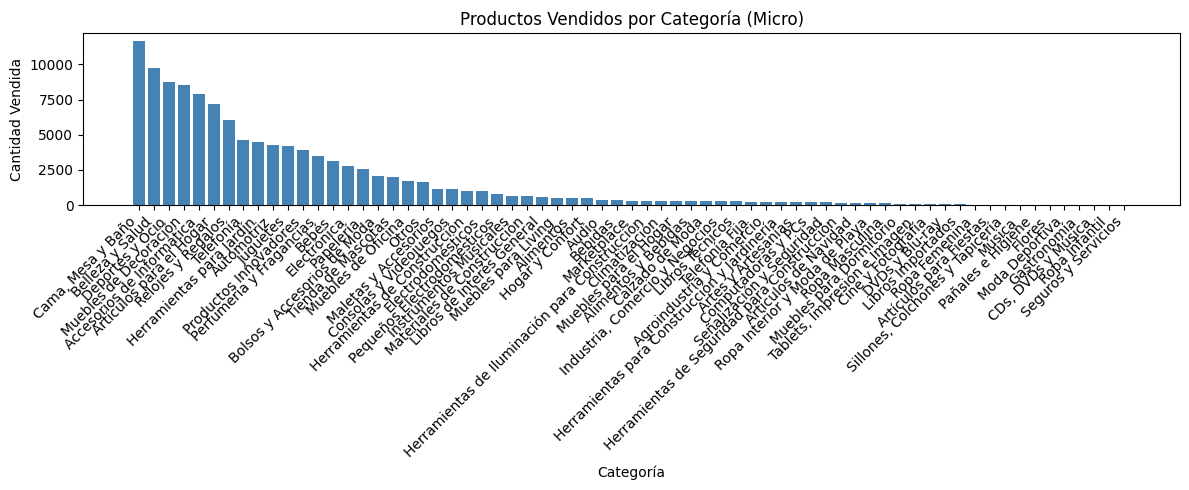

In [ ]:
import matplotlib.pyplot as plt

# 1) Grafico de Categorías (Micro)
# ----------------------------------------------------
# Excluir la fila 'Total' (si existe) para no deformar la escala del gráfico
micro_sin_total = productos_por_categoria[productos_por_categoria['product_category_name_es'] != 'Total']

plt.figure(figsize=(12, 5))
plt.bar(
    micro_sin_total['product_category_name_es'],
    micro_sin_total['cantidad_vendida'],
    color='steelblue'
)
plt.title('Productos Vendidos por Categoría (Micro)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')  # Girar etiquetas
plt.tight_layout()  # Ajustar márgenes
plt.show()



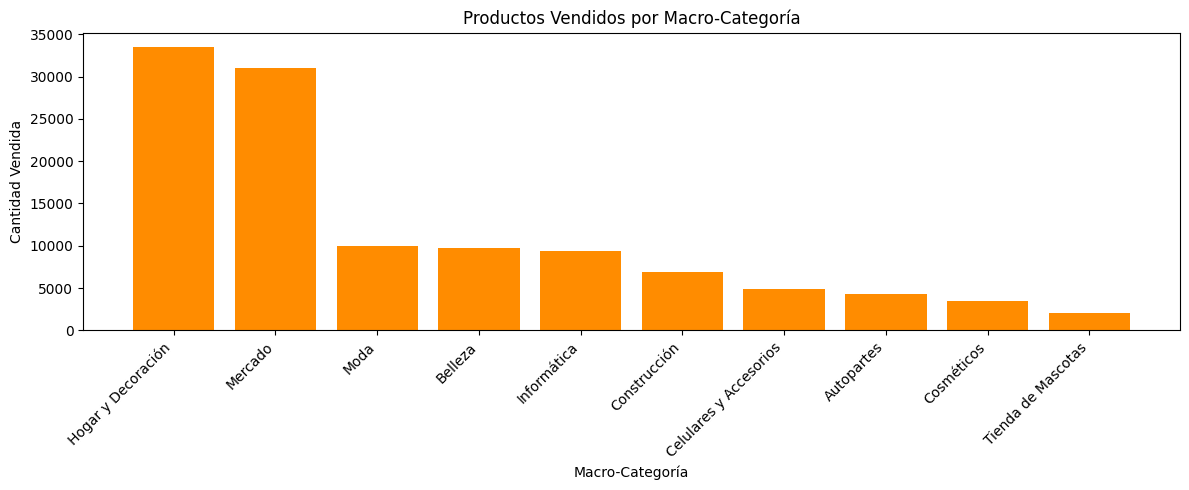

In [ ]:


# 2) Gráfico de Macro-Categorías
# ----------------------------------------------------
# Excluir la fila 'Total' (si existe)
macro_sin_total = productos_por_macro[productos_por_macro['macro_category'] != 'Total']

plt.figure(figsize=(12, 5))
plt.bar(
    macro_sin_total['macro_category'],
    macro_sin_total['cantidad_vendida'],
    color='darkorange'
)
plt.title('Productos Vendidos por Macro-Categoría')
plt.xlabel('Macro-Categoría')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
macro_category_counts = df['product_category_name_es'].value_counts().to_dict()
# Initialize a dictionary to store macro category counts
result_counts = {}
for macro_category, sub_categories in macro_categories_dict.items():
  if sub_categories in macro_category_counts:
    result_counts[macro_category]=macro_category_counts[sub_categories]
  else:
    result_counts[macro_category] = 0 # Assign 0 if not found
# Print the macro category counts
print(result_counts)

{'Muebles para Living': 0, 'Muebles para Dormitorio': 0, 'Sillones, Colchones y Tapicería': 0, 'Muebles de Decoración': 0, 'Muebles de Oficina': 0, 'Muebles para el Hogar': 0, 'Hogar y Confort': 0, 'Artículos para el Hogar': 0, 'Herramientas de Construcción': 0, 'Herramientas de Iluminación para Construcción': 0, 'Herramientas de Seguridad para Construcción': 0, 'Herramientas para Construcción y Jardinería': 0, 'Herramientas para Jardín': 0, 'Materiales de Construcción': 0, 'Electrodomésticos': 0, 'Electrodomésticos Portátiles': 0, 'Pequeños Electrodomésticos': 0, 'Accesorios para Horno y Café': 0, 'Electrónica': 0, 'Computadoras y PCs': 0, 'Accesorios de Informática': 0, 'Tablets, Impresión e Imagen': 0, 'Ropa Femenina': 0, 'Ropa Masculina': 0, 'Ropa Infantil': 0, 'Calzado de Moda': 0, 'Moda Deportiva': 0, 'Ropa Interior y Moda de Playa': 0, 'Bolsos y Accesorios de Moda': 0, 'Belleza y Salud': 0, 'Perfumería y Fragancias': 0, 'Telefonía': 4601, 'Telefonía Fija': 4601, 'Automotriz': 42

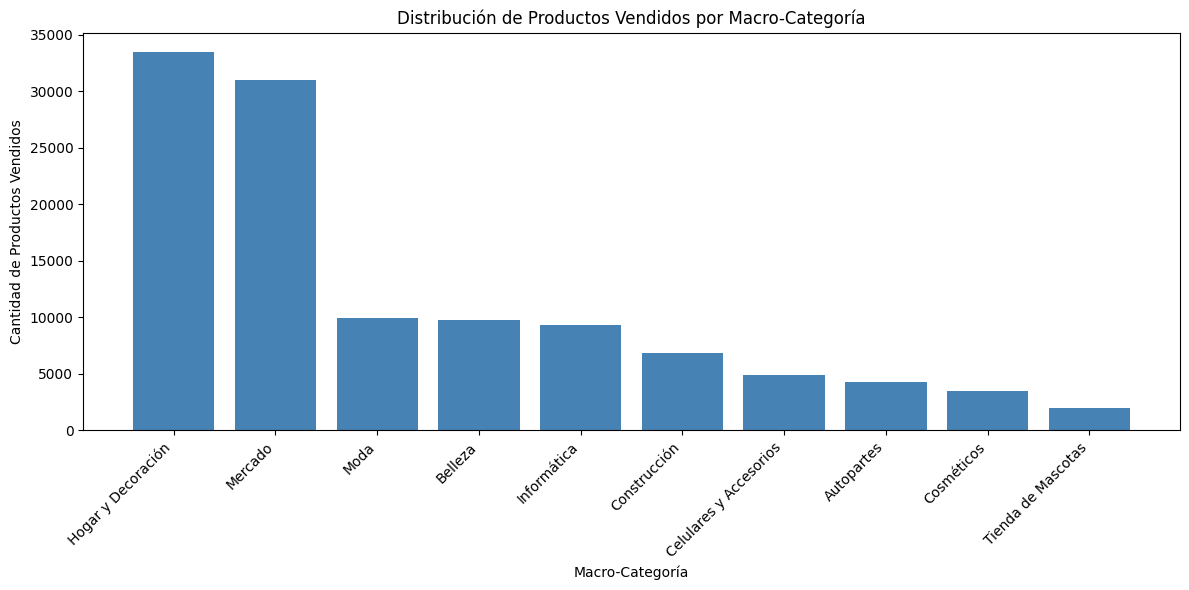

In [ ]:

# 1. Agrupar y contar el número de productos (o ítems) vendidos por macro_category
productos_por_macro = (
    df.groupby('macro_category')['order_id']  # Ajusta la columna si necesitas otra
    .count()
    .reset_index(name='cantidad_vendida')
)

# 2. Ordenar de mayor a menor
productos_por_macro.sort_values('cantidad_vendida', ascending=False, inplace=True)

# 3. Graficar
plt.figure(figsize=(12, 6))
plt.bar(productos_por_macro['macro_category'], productos_por_macro['cantidad_vendida'], color='steelblue')
plt.title('Distribución de Productos Vendidos por Macro-Categoría')
plt.xlabel('Macro-Categoría')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor legibilidad
plt.tight_layout()  # Ajustar márgenes para evitar recortes
plt.show()


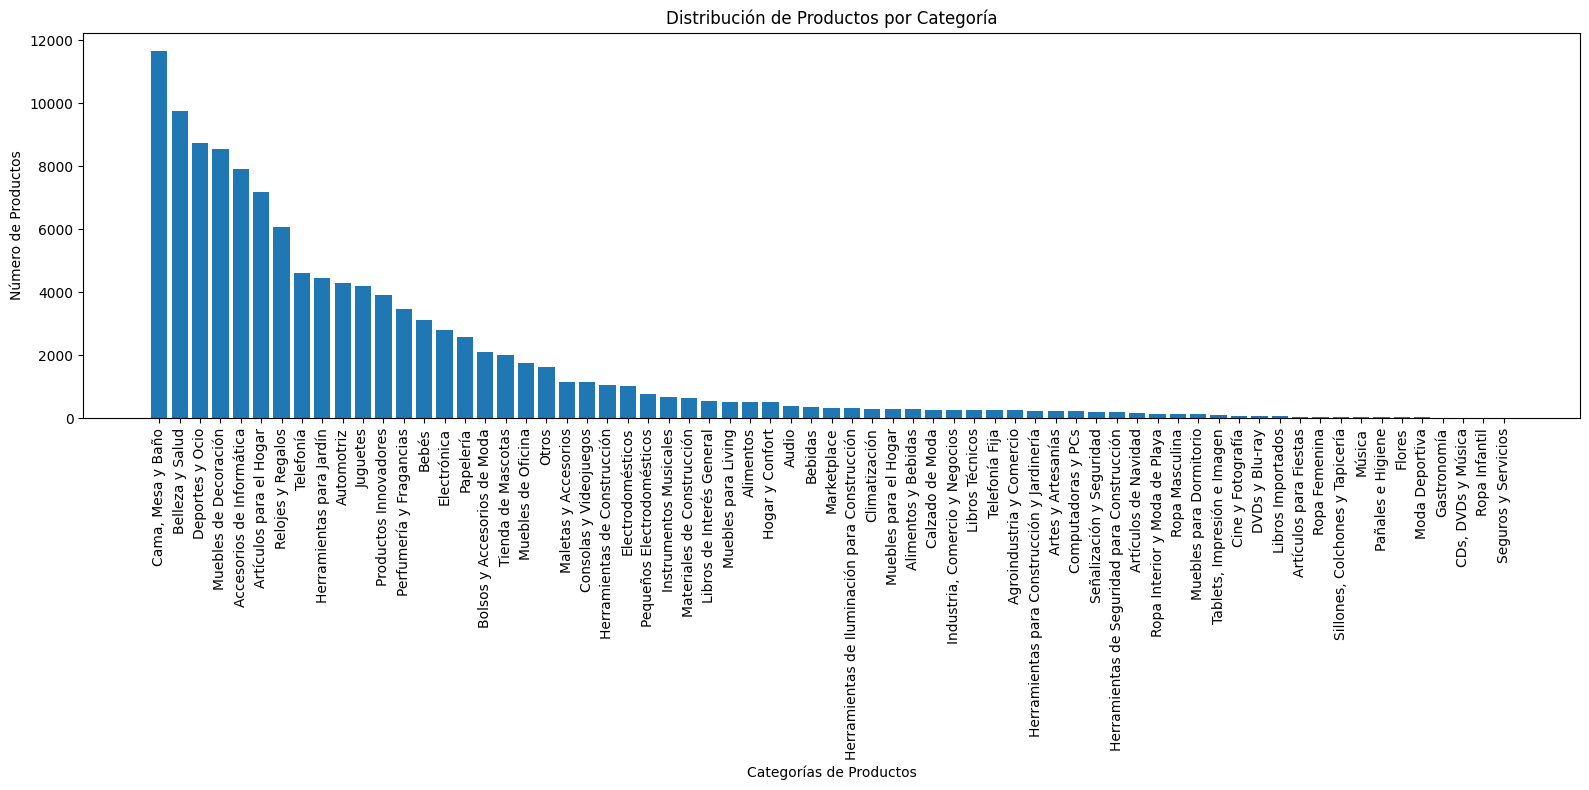

In [ ]:
# Calculate counts of individual categories
category_counts = df['product_category_name_es'].value_counts().to_dict()

# Create the bar chart
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel("Categorías de Productos")
plt.ylabel("Número de Productos")
plt.title("Distribución de Productos por Categoría")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
len(df['product_category_name_es'].unique())

67

In [ ]:
from collections import Counter

# Contamos cuántas veces aparece cada categoría traducida
conteo_traducciones = Counter(translation_dict.values())

# Filtramos las que están repetidas
categorias_repetidas = {k: v for k, v in conteo_traducciones.items() if v > 1}

# Mostramos el resultado
print(f"🔄 Categorías en español con nombres repetidos:")
for categoria, cantidad in categorias_repetidas.items():
    print(f" - {categoria}: {cantidad} veces")


In [ ]:
# 1. Extraer todas las categorías únicas del DataFrame
categorias_en_df = set(df['product_category_name'].unique())

# 2. Extraer todas las claves del diccionario
categorias_en_dict = set(translation_dict.keys())

# 3. Ver qué categorías del DataFrame no se encuentran en el diccionario
categorias_faltantes = categorias_en_df - categorias_en_dict

# 4. Imprimir las categorías faltantes
print(categorias_faltantes)


In [ ]:
df['product_category_name_es'].nunique()

Calculamos el número de productos que tiene cada categoría:

In [ ]:
productos_por_categoria = df.groupby('product_category_name_es')['product_id'].nunique().reset_index()
productos_por_categoria.rename(columns={'product_id': 'count_product_id'}, inplace=True)
productos_por_categoria = productos_por_categoria.sort_values(by='count_product_id', ascending=False)

productos_por_categoria.head(20)

In [ ]:
productos_mas_vendidos = df.groupby(['product_id', 'product_category_name_es'])['order_item_id'].count().reset_index()
productos_mas_vendidos.rename(columns={'order_item_id': 'total_vendidos'}, inplace=True)
productos_mas_vendidos = productos_mas_vendidos.sort_values(by='total_vendidos', ascending=False)
productos_mas_vendidos.head(10)

In [ ]:
df_categorias_agg = df.groupby('product_category_name_es').agg(
    #customer_count=('customer_unique_id', 'nunique'),
    order_count=('order_id', 'count'),
    total_payment_value=('payment_value', 'sum')
)

#df_categorias_agg['customer_count_pct'] = (df_categorias_agg['customer_count'] / df_categorias_agg['customer_count'].sum() * 100).round(2).astype(str) + '%'
df_categorias_agg['order_count_pct'] = (df_categorias_agg['order_count'] / df_categorias_agg['order_count'].sum() * 100).round(2).astype(str) + '%'
df_categorias_agg['total_payment_value_pct'] = (df_categorias_agg['total_payment_value'] / df_categorias_agg['total_payment_value'].sum() * 100).round(2).astype(str) + '%'

df_categorias_agg = df_categorias_agg.sort_values(by=['total_payment_value'], ascending=False).head(10)
df_categorias_agg


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# 🔹 Seleccionar las 10 categorías principales por número de pedidos
top_10_categories = df_categorias_agg.nlargest(10, "order_count")

# 🔹 Ordenar las categorías por número de pedidos (de mayor a menor)
top_10_categories = top_10_categories.sort_values("order_count", ascending=True)

# 🔹 Convertir los valores monetarios a millones
top_10_categories["total_payment_value_millions"] = top_10_categories["total_payment_value"] / 1_000_000

# 🔹 Configurar la figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 📊 **Gráfico 1: Número de pedidos**
sns.barplot(
    ax=axes[0],
    x="order_count",
    y="product_category_name_es",
    data=top_10_categories,
    color="#001647"
)
axes[0].set_title("Top 10: Número de Pedidos por Categoría de Producto", fontsize=14)
axes[0].set_xlabel("Número de Pedidos", fontsize=12)
axes[0].set_ylabel("Categoría de Producto", fontsize=12)

# 📊 **Gráfico 2: Valor total de pagos en millones (también ordenado)**
top_10_categories = top_10_categories.sort_values("total_payment_value_millions", ascending=True)
sns.barplot(
    ax=axes[1],
    x="total_payment_value_millions",
    y="product_category_name_es",
    data=top_10_categories,
    color="#E64E36"
)
axes[1].set_title("Top 10: Valor Total de Pagos por Categoría de Producto", fontsize=14)
axes[1].set_xlabel("Valor Total de Pagos (Millones)", fontsize=12)
axes[1].set_ylabel("")  # 🔹 Ocultar etiquetas duplicadas

# 🔹 Formato en millones
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x:,.1f}M"))

# 🔹 Ajustar el espacio entre gráficos
plt.tight_layout()

# 🔹 Mostrar gráfico
plt.show()



In [ ]:
# # Tomamos el top 10 de categorías más populares
# top_categories = df.groupby('product_category_name').agg(
#     order_count=('order_id', 'count'),
#     total_payment_value=('payment_value', 'sum')
# ).sort_values(by=['order_count', 'total_payment_value'], ascending=False).head(10)

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Colores según lo solicitado
color_pedidos = '#001647'
color_ingresos = '#E64E36'

# Eje primario (barras)
ax1.bar(top_10_categories.index, top_10_categories['order_count'], color=color_pedidos, alpha=0.8, label='Pedidos')

ax1.set_ylabel('Cantidad de Pedidos', color=color_pedidos)
ax1.tick_params(axis='y', labelcolor=color_pedidos)
ax1.set_xticklabels(top_10_categories.index, rotation=45, ha='right')

# Eje secundario (línea)
ax2 = ax1.twinx()
ax2.plot(top_10_categories.index, top_10_categories['total_payment_value'], color=color_ingresos, marker='o', linewidth=2, markersize=6, label='Ingresos Totales')

ax2.set_ylabel('Ingresos Totales ($)', color=color_ingresos)
ax2.tick_params(axis='y', labelcolor=color_ingresos)

# Leyenda bien posicionada
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1, 1))

# Título
fig.suptitle('Top 10 Categorías por Pedidos e Ingresos', fontsize=14)

plt.show()


## ¿Cuáles son las categorías que dan más beneficio?

Creo la columna precio_ticket que es la suma del payment_value por cada payment_sequential de cada order_id.

Creo la columna beneficio que resta al precio ticket la suma del price y freight_value por cada order_item_id de cada order_id.

In [ ]:
df["precio_ticket"] = df.groupby(["order_id", "payment_sequential"])["payment_value"].transform("first")
df["precio_ticket"] = df.groupby("order_id")["precio_ticket"].transform("sum")

payment_sum = df.drop_duplicates(subset=["order_id", "payment_sequential"]).groupby("order_id")["payment_value"].sum()
price_sum = df.drop_duplicates(subset=["order_id", "order_item_id"]).groupby("order_id")["price"].sum()
freight_sum = df.drop_duplicates(subset=["order_id", "order_item_id"]).groupby("order_id")["freight_value"].sum()

df["beneficio_ticket"] = df["order_id"].map((payment_sum - price_sum - freight_sum).round(8))

In [ ]:
df_categorias_agg = df.groupby('product_category_name_es').agg(
    order_count=('order_id', 'count'),
    total_payment_value=('payment_value', 'sum'),
    beneficio_total=('beneficio_ticket', 'sum')
).sort_values(by=['beneficio_total', 'total_payment_value', 'order_count'], ascending=False)
df_categorias_agg.head(10)

In [ ]:
df.head(3)

In [ ]:
# Tomamos las 10 categorías con mayor beneficio
top_10_categories = df_categorias_agg.sort_values('beneficio_total', ascending=False).head(10)

# Ajustamos el estilo
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Gráfico de barras del beneficio total por categoría
ax = sns.barplot(
    x=top_10_categories.index,
    y=top_10_categories['beneficio_total'],
    palette="Blues_r"
)

# Agregar etiquetas de valores sobre las barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',  # Formatear número con separador de miles
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

# Ajustar títulos y etiquetas
plt.title('Top 10: Beneficio por Categoría de Producto', fontsize=14)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Beneficio Total', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotamos y alineamos los nombres para mejor visibilidad

# Ajuste de diseño
plt.tight_layout()
plt.show()


# ¿Cuáles son los estados en los que más se compra?

In [ ]:


# Agrupamos los datos por estado del vendedor
state_summary = df.groupby('seller_state_full').agg(
    order_count=('order_id', 'count'),
    total_payment_value=('payment_value', 'sum')
).sort_values(by='total_payment_value', ascending=False).head(10)

# Convertimos los valores de pago a miles para una mejor visualización
state_summary['total_payment_value'] /= 1_000
state_summary.reset_index(inplace=True)

# Ajustes generales de estilo
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))

### 🔹 Gráfico 1: Número de pedidos por estado
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    x='seller_state_full',
    y='order_count',
    data=state_summary,
    palette="Blues_r"
)

# Agregar etiquetas de valores sobre las barras
for p in ax1.patches:
    ax1.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Top 10: Número de Pedidos por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.xticks(rotation=45, ha='right')

### 🔹 Gráfico 2: Valor total de pagos por estado (en miles)
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    x='seller_state_full',
    y='total_payment_value',
    data=state_summary,
    palette="Reds_r"
)

# Agregar etiquetas de valores sobre las barras
for p in ax2.patches:
    ax2.annotate(
        f'{p.get_height():,.0f}K',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Top 10: Valor Total de Pagos por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Valor Total de Pagos (miles)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajustamos los espacios para que los gráficos no se solapen
plt.tight_layout()
plt.show()


## ¿Cuáles son las categorías más vendidas por Estado?

In [ ]:
ventas_por_estado_categoria = df.groupby(['seller_state_full', 'product_category_name']).size().reset_index(name='total_vendidos')
ventas_por_estado_categoria = ventas_por_estado_categoria.sort_values(by=['seller_state_full', 'total_vendidos'], ascending=[True, False])

top_por_estado = ventas_por_estado_categoria.groupby('seller_state_full').head(5)
top_por_estado.sort_values(by='total_vendidos', ascending=False).head(20)

In [ ]:
import plotly.express as px

# Ordenamos los estados por total de vendidos
df_top5_sorted = top_por_estado.groupby('seller_state').agg(
    {'total_vendidos': 'sum'}
).sort_values('total_vendidos', ascending=False).reset_index()

# Dividimos en tres grupos (9 estados por gráfico)
df_1 = df_top5_sorted.head(9)  # Top 9
df_2 = df_top5_sorted.iloc[9:18]  # Del 10 al 18
df_3 = df_top5_sorted.iloc[18:]  # Del 19 al 27

# Función para graficar
def plot_bar(df_part, title):
    df_filtered = top_por_estado[top_por_estado['seller_state'].isin(df_part['seller_state'])]

    df_pivot = df_filtered.pivot_table(
        index='seller_state',
        columns='product_category_name',
        values='total_vendidos',
        aggfunc='sum',
        fill_value=0
    ).reset_index()

    # Asegurar que hay datos para graficar
    if df_pivot.empty:
        print(f"No hay datos para {title}")
        return None

    df_pivot['total_compras'] = df_pivot.drop('seller_state', axis=1).sum(axis=1)
    df_pivot = df_pivot.sort_values('total_compras', ascending=False)

    # Definimos colores personalizados para mejor diferenciación
    color_palette = px.colors.qualitative.Set3  # Paleta más variada

    fig = px.bar(df_pivot,
                 x='seller_state',
                 y=df_pivot.columns[1:-1],
                 title=title,
                 labels={'seller_state': 'Estado', 'value': 'Número de Compras'},
                 color_discrete_sequence=color_palette)

    fig.update_layout(
        barmode='stack',
        xaxis_title='Estado',
        yaxis_title='Número de Compras',
        xaxis_tickangle=-45,
        legend_title='Categorías de Producto',
    )
    return fig

# Generar y mostrar gráficos solo si hay datos
fig1 = plot_bar(df_1, 'Top 9 Estados con Más Ventas')
fig2 = plot_bar(df_2, 'Estados del 10 al 18 con Más Ventas')
fig3 = plot_bar(df_3, 'Estados del 19 al 27 con Más Ventas')

if fig1: fig1.show()
if fig2: fig2.show()
if fig3: fig3.show()


In [ ]:
# Aseguramos que `seller_state_full` esté presente en `top_por_estado`
if 'seller_state_full' not in top_por_estado.columns:
    top_por_estado['seller_state_full'] = top_por_estado['seller_state'].map(state_fullname_map)

# Agrupamos los datos por estado completo del vendedor
df_top5_sorted = top_por_estado.groupby('seller_state_full').agg(
    {'total_vendidos': 'sum'}
).sort_values('total_vendidos', ascending=False).reset_index()

# Dividimos los datos en tres grupos de 9 estados cada uno
df_1 = df_top5_sorted.head(9)  # Top 9 estados
df_2 = df_top5_sorted.iloc[9:18]  # Del 10 al 18
df_3 = df_top5_sorted.iloc[18:]  # Del 19 al 27

# Función para graficar con nombres completos de estados
def plot_bar(df_part, title):
    df_filtered = top_por_estado[top_por_estado['seller_state_full'].isin(df_part['seller_state_full'])]

    df_pivot = df_filtered.pivot_table(
        index='seller_state_full',
        columns='product_category_name',
        values='total_vendidos',
        aggfunc='sum',
        fill_value=0
    ).reset_index()

    # Verificamos si hay datos antes de graficar
    if df_pivot.empty:
        print(f"No hay datos para {title}")
        return None

    df_pivot['total_compras'] = df_pivot.drop('seller_state_full', axis=1).sum(axis=1)
    df_pivot = df_pivot.sort_values('total_compras', ascending=False)

    # Usamos una paleta de colores variada para mejor visualización
    color_palette = px.colors.qualitative.Set3

    fig = px.bar(df_pivot,
                 x='seller_state_full',
                 y=df_pivot.columns[1:-1],
                 title=title,
                 labels={'seller_state_full': 'Estado', 'value': 'Número de Compras'},
                 color_discrete_sequence=color_palette)

    fig.update_layout(
        barmode='stack',
        xaxis_title='Estado',
        yaxis_title='Número de Compras',
        xaxis_tickangle=-45,  # Rotamos etiquetas para evitar solapamientos
        legend_title='Categorías de Producto',
    )
    return fig

# Generar y mostrar gráficos solo si hay datos
fig1 = plot_bar(df_1, 'Top 9 Estados con Más Ventas')
fig2 = plot_bar(df_2, 'Estados del 10 al 18 con Más Ventas')
fig3 = plot_bar(df_3, 'Estados del 19 al 27 con Más Ventas')

if fig1: fig1.show()
if fig2: fig2.show()
if fig3: fig3.show()


In [ ]:
# Asegurar que `product_category_name_es` no tenga NaN
top_por_estado['product_category_name_es'].fillna('Sin Categoría', inplace=True)

# Seleccionamos los 10 estados con más ventas
top_states = top_por_estado.groupby('seller_state_full').agg({'total_vendidos': 'sum'}).nlargest(10, 'total_vendidos').reset_index()

# Filtramos el dataset original para incluir solo estos estados
df_filtered = top_por_estado[top_por_estado['seller_state_full'].isin(top_states['seller_state_full'])]

# 🔹 Determinar las 3 categorías más vendidas por estado y agrupar el resto en "Otras categorías" (excepto São Paulo)
df_filtered['rank'] = df_filtered.groupby('seller_state_full')['total_vendidos'].rank(method='first', ascending=False)

# São Paulo muestra TODAS sus categorías, los demás solo 3 + "Otras categorías"
df_filtered['product_category_grouped'] = df_filtered.apply(
    lambda row: row['product_category_name_es']
    if (row['seller_state_full'] == 'São Paulo' or row['rank'] <= 3) else 'Otras categorías',
    axis=1
)

# 🔹 Volvemos a agrupar con la nueva columna "product_category_grouped"
df_grouped = df_filtered.groupby(['seller_state_full', 'product_category_grouped']).agg({'total_vendidos': 'sum'}).reset_index()

# 🔹 Creamos la tabla pivote
df_pivot = df_grouped.pivot_table(
    index='seller_state_full',
    columns='product_category_grouped',
    values='total_vendidos',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Ordenamos los estados de mayor a menor total de ventas
df_pivot['total_compras'] = df_pivot.drop('seller_state_full', axis=1).sum(axis=1)
df_pivot = df_pivot.sort_values('total_compras', ascending=False)

# 🔹 Definir una paleta de colores única para cada categoría
unique_categories = df_pivot.columns[1:-1]  # Excluir 'seller_state_full' y 'total_compras'
category_colors = {
    'Otras categorías': '#B0BEC5',  # Gris para destacar que es un grupo
    'Accesorios Automotrices': '#FF5733',
    'Accesorios de Informática': '#4285F4',
    'Accesorios para el Hogar': '#34A853',
    'Alimentos y Bebidas': '#FBBC05',
    'Belleza y Salud': '#A52A2A',
    'Consolas y Videojuegos': '#8E44AD',
    'Deportes y Ocio': '#FF8C00',
    'Electrónica': '#1E90FF',
    'Herramientas para Jardín': '#228B22',
    'Juguetes': '#FF1493',
    'Muebles de Decoración': '#D2691E',
    'PCs': '#20B2AA',
    'Perfumería y Fragancias': '#FF69B4',
    'Productos Innovadores': '#9932CC',
    'Relojes y Regalos': '#808000',
    'Telefonía': '#FF4500'
}

# Asignar colores solo a las categorías presentes en el dataset
color_palette = [category_colors[cat] if cat in category_colors else '#000000' for cat in unique_categories]

# 🔹 Separar São Paulo en un gráfico aparte (muestra todas sus categorías)
df_pivot_sp = df_pivot[df_pivot['seller_state_full'] == 'São Paulo']
df_pivot_rest = df_pivot[df_pivot['seller_state_full'] != 'São Paulo']

# 🔹 Gráfico de São Paulo (todas las categorías)
fig_sp = px.bar(
    df_pivot_sp,
    x='seller_state_full',
    y=df_pivot_sp.columns[1:-1],  # Excluimos la columna de estados y la de total_compras
    title='São Paulo: Categorías con Más Ventas',
    labels={'seller_state_full': 'Estado', 'value': 'Total de Ventas'},
    color_discrete_sequence=color_palette
)

# 🔹 Mejoramos la visualización de São Paulo
fig_sp.update_layout(
    barmode='stack',
    xaxis_title='Estado',
    yaxis_title='Total de Ventas',
    xaxis_tickangle=0,  # Enderezamos etiquetas
    legend_title='Categorías de Producto',
)

# 🔹 Gráfico del resto de los estados (solo 3 categorías + "Otras categorías")
fig_rest = px.bar(
    df_pivot_rest,
    x='seller_state_full',
    y=df_pivot_rest.columns[1:-1],
    title='Top 9 Estados (excluyendo São Paulo): Categorías con Más Ventas',
    labels={'seller_state_full': 'Estado', 'value': 'Total de Ventas'},
    color_discrete_sequence=color_palette
)

# 🔹 Mejoramos la visualización de los demás estados
fig_rest.update_layout(
    barmode='stack',
    xaxis_title='Estado',
    yaxis_title='Total de Ventas',
    xaxis_tickangle=0,  # Enderezamos etiquetas
    legend_title='Categorías de Producto',
)

# 🔹 Mostrar gráficos
fig_sp.show()
fig_rest.show()


# ¿Cuál es el medio de pago predominante?

In [ ]:
# Diccionario de traducción de métodos de pago
payment_translation = {
    'credit_card': 'Tarjeta de Crédito',
    'boleto': 'Boleto Bancario',
    'voucher': 'Voucher',
    'debit_card': 'Tarjeta de Débito',
}

# Contar la cantidad de cada método de pago
metodos_pago = df["payment_type"].value_counts()

# Aplicar la traducción a los nombres
metodos_pago.index = metodos_pago.index.map(payment_translation)

# Convertir los valores a miles
metodos_pago = metodos_pago / 1_000

# Mostrar los métodos de pago en la consola
print("\nMétodos de pago más utilizados (en miles):")
print(metodos_pago)

# Graficar
plt.figure(figsize=(8,5))
ax = sns.barplot(x=metodos_pago.index, y=metodos_pago.values, palette=['#001647'])

# Agregar etiquetas en las barras con formato en miles
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.1f}K",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Personalizar el gráfico
plt.title("Métodos de Pago Más Utilizados")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Transacciones (en miles)")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


## ¿Cuál es el gasto promedio atendiendo al número de cuotas?

## !!! ¿Habría que usar payment_value o precio_ticket?

In [ ]:
df.head()

In [ ]:
print(df[['payment_value', 'precio_ticket']].describe())


In [ ]:
import plotly.express as px

# Calcular la suma total de compras según el número de cuotas
facturacion_cuotas = df.groupby("payment_installments")["precio_ticket"].sum().reset_index()

# Ordenar por número de cuotas
facturacion_cuotas = facturacion_cuotas.sort_values("payment_installments")

# Usar un solo color para todas las barras
color_unico = "#4285F4"  # Azul corporativo para mejor presentación

# Crear el gráfico de barras con la suma total de compras
fig = px.bar(
    facturacion_cuotas,
    x="payment_installments",
    y="precio_ticket",
    text="precio_ticket",  # Agregar etiquetas en las barras
    color_discrete_sequence= ['#001647']  # Color único para todo el gráfico
)

# Personalizar el diseño
fig.update_layout(
    title="Total de Compras según Número de Cuotas",
    xaxis_title="Número de Cuotas",
    yaxis_title="Total de Compras",
    showlegend=False,  # Ocultamos la leyenda porque todas las barras son del mismo color
    height=500,  # Ajustamos el tamaño del gráfico
    width=1000  # Mejor para presentación
)

# Mostrar todas las etiquetas en el eje X
fig.update_xaxes(tickmode="linear", dtick=1)

# Mejorar el formato de los valores en las barras (mostrar en miles o millones según el tamaño de los datos)
fig.update_traces(texttemplate="%{text:,.0f}", textposition="outside")

# Mostrar el gráfico
fig.show()


In [ ]:
pd.set_option('display.max_columns', None)
df[df['payment_installments'] <1]

# ¿Cuál es la distribución de las calificaciones de los clientes en las reseñas?

In [ ]:
import plotly.express as px

# Contar la cantidad de cada review score
review_counts = df['review_score'].value_counts().sort_index().reset_index()
review_counts.columns = ['Review Score', 'Cantidad']
review_counts["Review Score"] = review_counts["Review Score"].astype(int).astype(str)

# Definir color único
color_unico = '#001647'  # Azul oscuro

# Crear el gráfico de barras con un solo color
fig = px.bar(
    review_counts,
    x="Review Score",
    y="Cantidad",
    text="Cantidad",  # Mostrar valores en las barras
    color_discrete_sequence=[color_unico]  # Color único para todo el gráfico
)

# Personalizar el diseño
fig.update_traces(textposition='outside', hoverinfo='x+y', hovertemplate='Score: %{x}<br>Cantidad: %{y}')
fig.update_layout(
    title="Distribución de Review Scores",
    xaxis_title="Review Score",
    yaxis_title="Cantidad",
    template="plotly_white",
    showlegend=False  # Ocultar la leyenda porque es un solo color
)

# Mostrar el gráfico
fig.show()


## ¿Qué categorías de productos tienen las mejores y peores calificaciones?

In [ ]:
calificaciones_categoria = df.groupby('product_category_name_es')['review_score'].mean().sort_values()
print(f"El top 5 de las categorías con mejor calificación: {calificaciones_categoria.round(2).sort_values(ascending = False).head()}")

In [ ]:
print(f"El top 5 de las categorías con peor calificación: {calificaciones_categoria.round(2).head()}")

In [ ]:
import matplotlib.pyplot as plt

# Calcular la calificación promedio por categoría y ordenarlas
calificaciones_categoria = df.groupby('product_category_name_es')['review_score'].mean().sort_values()

# Definir un solo color azul oscuro
color_unico = '#001647'

# Crear el gráfico de barras con un solo color
plt.figure(figsize=(16, 8))
calificaciones_categoria.plot(kind='bar', color=color_unico)
plt.title('Calificación Promedio por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Calificación Promedio')

# Mostrar el gráfico
plt.show()


## ¿Cómo se distribuyen las calificaciones por Estado?

In [ ]:
import matplotlib.pyplot as plt

# Agrupar y calcular la distribución porcentual de calificaciones por estado
df_review_state = df.groupby('seller_state_full')['review_score'].value_counts().unstack().fillna(0)
df_review_state_pct = df_review_state.div(df_review_state.sum(axis=1), axis=0) * 100
df_review_state_pct = df_review_state_pct.round(2)

# **Ordenar las columnas de menor a mayor para que 1 esté abajo y 5 arriba en la gráfica**
df_review_state_pct = df_review_state_pct[[1, 2, 3, 4, 5]]

# Definir los colores: Rojo para calificaciones ≤ 3, Azul para > 3
color_map = {
    1: '#e64e36',  # Rojo
    2: '#e64e36',  # Rojo
    3: '#e64e36',  # Rojo
    4: '#001647',  # Azul
    5: '#001647'   # Azul
}

# Obtener los colores en el orden correcto (para que 5 quede arriba)
colores = [color_map[score] for score in df_review_state_pct.columns]

# Crear el gráfico de barras apiladas con los colores asignados
df_review_state_pct.plot(
    kind='bar',
    stacked=True,
    color=colores,
    figsize=(12,6)
)

# Personalizar el diseño del gráfico
plt.title('Distribución porcentual de las Calificaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Porcentaje (%)')

# **Corregir el orden de la leyenda (de 5 a 1)**
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(list(reversed(handles)), list(reversed(labels)), title="Review Score", loc="upper right", bbox_to_anchor=(1.2,1))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()



## ¿Los clientes que dejan comentarios negativos tienen patrones de compra distintos a los que dejan comentarios positivos?

In [ ]:
reseñas_positivas = df[df['review_score'] >= 4]
reseñas_neutras = df[df['review_score'] ==3]
reseñas_negativas = df[df['review_score'] <= 2]
sin_reseña = df[df['review_score'].isnull()]

print("Promedio de valor de pago en reseñas positivas:", reseñas_positivas['payment_value'].mean().round(2))
print("Promedio de valor de pago en reseñas neutras:", reseñas_neutras['payment_value'].mean().round(2))
print("Promedio de valor de pago en reseñas negativas:", reseñas_negativas['payment_value'].mean().round(2))
print("Promedio de valor de pago sin reseña:", sin_reseña['payment_value'].mean().round(2))

## ¿Cómo impacta el tiempo de entrega en la calificación del pedido?

Creo columna delivery_delay, indica la diferencia entre la fecha estimada de entrega y la fecha real de entrega.
Creo las columnas on_time, late_delivery que de manera independiente informan si la entrega se hizo a tiempo o tarde

In [ ]:
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
df['on_time'] = df['delivery_delay'] <= 0
df['late_delivery'] = df['delivery_delay'] > 0

In [ ]:
df['late_delivery'] = df['late_delivery'].map({False: "on_time", True: "late_delivery"})
# Agrupar por review_score y estado de entrega
df_delivery_review = df.groupby(['late_delivery', 'review_score']).size().unstack().fillna(0)

# Convertir a porcentaje
df_delivery_review = df_delivery_review.div(df_delivery_review.sum(axis=1), axis=0) * 100

# Graficar
fig = px.bar(
    df_delivery_review.T,
    barmode="stack",
    color_discrete_sequence=['#e64e36', '#001647', '#c8906d', '#779e3d', '#0a4ee4']
)

fig.update_layout(
    title="Impacto de los pedidos tardíos y en tiempo en las Reseñas",
    xaxis_title="Calificación de la Reseña",
    yaxis_title="Porcentaje (%)",
    xaxis=dict(type="category"),
    legend_title="Entrega a Tiempo",
)

fig.show()


# ¿Cuáles son los plazos en las distintas fases de envío?

In [ ]:

print('\033[1mTiempo total de procesamiento del pedido: medir la eficiencia de todo el proceso logístico, desde la compra hasta la entrega final.\033[0m')
df['processing_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
max_processing_time = df.sort_values(by='processing_time', ascending=False).iloc[0]['processing_time']
min_processing_time = df.sort_values(by='processing_time', ascending=False).iloc[-1]['processing_time']
mean_processing_time = df['processing_time'].mean().round(2)
print(f"Tiempo total de procesamiento del pedido máximo: {max_processing_time}")
print(f"Tiempo total de procesamiento del pedido mínimo: {min_processing_time}")
print(f"Tiempo total de procesamiento del pedido medio: {mean_processing_time}")
print("_" * 20)

print('\033[1mTiempo de aprobación del pedido:Identificar si hay un retraso en la aprobación de pedidos que podría estar afectando los tiempos generales.\033[0m')
df['approval_time'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days
max_approval_time = df.sort_values(by='approval_time', ascending=False).iloc[0]['approval_time']
min_approval_time = df.sort_values(by='approval_time', ascending=False).iloc[-1]['approval_time']
mean_approval_time = df['approval_time'].mean().round(2)
print(f"Tiempo total de aprobación del pedido máximo: {max_approval_time}")
print(f"Tiempo total de aprobación del pedido mínimo: {min_approval_time}")
print(f"Tiempo total de aprobación del pedido medio: {mean_approval_time}")
print("_" * 20)

print('\033[1mTiempo de preparación antes de la entrega al transportista:Un retraso en esta fase puede indicar problemas en la preparación de los productos o en la gestión de inventario.\033[0m')
df['prep_time'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.days
max_prep_time = df.sort_values(by='prep_time', ascending=False).iloc[0]['prep_time']
min_prep_time = df.sort_values(by='prep_time', ascending=False).iloc[-1]['prep_time']
mean_prep_time = df['prep_time'].mean().round(2)
print(f"Tiempo total de preparación antes de la entrega al transportista máximo: {max_prep_time}")
print(f"Tiempo total de preparación antes de la entrega al transportista mínimo: {min_prep_time}")
print(f"Tiempo total de preparación antes de la entrega al transportista medio: {mean_prep_time}")
print("_" * 20)

print('\033[1mCumplimiento con la fecha límite de envío:  Identificar si hay retrasos en la fase de envío que podrían afectar la capacidad de cumplir con las fechas de entrega estimadas.\033[0m')
df['shipping_late_days'] = (df['order_delivered_carrier_date'] - df['shipping_limit_date']).dt.days
max_shipping_late_days = df.sort_values(by='shipping_late_days', ascending=False).iloc[0]['shipping_late_days']
min_shipping_late_days = df.sort_values(by='shipping_late_days', ascending=False).iloc[-1]['shipping_late_days']
mean_shipping_late_days = df['shipping_late_days'].mean().round(2)
print(f"Retraso en la dase de envío máximo: {max_shipping_late_days}")
print(f"Retraso en la dase de envío máximo mínimo: {min_shipping_late_days}")
print(f"Retraso en la dase de envío máximo medio: {mean_shipping_late_days}")
print("_" * 20)

print('\033[1mCumplimiento con la fecha estimada de entrega: permite ver si los pedidos llegaron dentro de los tiempos estimados, lo cual es fundamental para la satisfacción del cliente.\033[0m')
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
max_delivery_delay = df.sort_values(by='delivery_delay', ascending=False).iloc[0]['delivery_delay']
min_delivery_delay = df.sort_values(by='delivery_delay', ascending=False).iloc[-1]['delivery_delay']
mean_delivery_delay = df['delivery_delay'].mean().round(2)
print(f"Mayor retraso en la fecha estimada de entrega : {max_delivery_delay}")
print(f"Mayor adelanto en la fecha estimada de entrega: {min_delivery_delay}")
print(f"Cumplimiento con la fecha estimada de entrega medio: {mean_delivery_delay}")
print("_" * 20)
print('\033[1mTiempo de entrega real frente a estimada: Es útil para mejorar las estimaciones de tiempo y detectar problemas recurrentes en la cadena de suministro.\033[0m')
df['on_time'] = df['delivery_delay'] <= 0
a_tiempo =  df['on_time'].sum()
print(f"El número de entregas en plazo es de: {a_tiempo}")
print("_" * 20)
print('\033[1mAnálisis de pedidos tardíos:Determinar qué porcentaje de pedidos llegan tarde, lo cual es crucial para mejorar el servicio al cliente y la logística.\033[0m')
df['late_delivery'] = df['delivery_delay'] > 0
retrasos = df['late_delivery'].sum()
print(f"El número de entregas fuera de plazo es de: {retrasos}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all(df):
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))

    # 🔹 1. Violin Plot: Distribución del Tiempo de Procesamiento
    sns.violinplot(x=df['processing_time'], inner='quartile', color='#E64E36', ax=axes[0, 0])
    axes[0, 0].set_title('Distribución del Tiempo de Procesamiento', fontsize=12)
    axes[0, 0].set_xlabel('Tiempo de Procesamiento (días)', fontsize=10)
    axes[0, 0].grid(True, linestyle="--", alpha=0.5)

    # 🔹 2. Boxplot: Tiempo de Aprobación
    sns.boxplot(x=df['approval_time'], color='#779E3D', ax=axes[0, 1])
    mean_approval = df['approval_time'].mean()
    axes[0, 1].axvline(mean_approval, color='black', linestyle='--', label=f'Media: {mean_approval:.2f} días')
    axes[0, 1].legend()
    axes[0, 1].set_title('Distribución del Tiempo de Aprobación', fontsize=12)
    axes[0, 1].grid(True, linestyle="--", alpha=0.5)

    # 🔹 3. Boxplot: Tiempo de Preparación
    sns.boxplot(x=df['prep_time'], color='#C8906D', ax=axes[0, 2])
    axes[0, 2].set_title('Distribución del Tiempo de Preparación', fontsize=12)
    axes[0, 2].grid(True, linestyle="--", alpha=0.5)

    # 🔹 4. Histograma: Tiempo de Preparación
    sns.histplot(df['prep_time'], kde=True, bins=30, color='#C8906D', ax=axes[1, 0])
    axes[1, 0].set_title('Histograma del Tiempo de Preparación', fontsize=12)
    axes[1, 0].grid(True, linestyle="--", alpha=0.5)

    # 🔹 5. Boxplot: Retrasos en Envío
    sns.boxplot(x=df['shipping_late_days'], color='#E64E36', ax=axes[1, 1])
    axes[1, 1].set_title('Distribución de Retrasos en Envío', fontsize=12)
    axes[1, 1].set_xscale('log')  # 🔹 Escala logarítmica para mayor claridad
    axes[1, 1].grid(True, linestyle="--", alpha=0.5)

    # 🔹 6. Histograma: Retrasos en Envío
    sns.histplot(df['shipping_late_days'], kde=True, bins=30, color='#E64E36', ax=axes[1, 2])
    axes[1, 2].set_title('Histograma de Retrasos en Envío', fontsize=12)
    axes[1, 2].set_xscale('log')  # 🔹 Escala logarítmica
    axes[1, 2].grid(True, linestyle="--", alpha=0.5)

    # 🔹 7. Boxplot: Retrasos/Adelantos en Entregas
    sns.boxplot(x=df['delivery_delay'], color='#87C7AD', ax=axes[2, 0])
    axes[2, 0].set_title('Distribución de Retrasos/Adelantos', fontsize=12)
    axes[2, 0].grid(True, linestyle="--", alpha=0.5)

    # 🔹 8. Histograma: Retrasos/Adelantos
    sns.histplot(df['delivery_delay'], kde=True, bins=30, color='#87C7AD', ax=axes[2, 1])
    axes[2, 1].set_title('Histograma de Retrasos/Adelantos', fontsize=12)
    axes[2, 1].grid(True, linestyle="--", alpha=0.5)

    # 🔹 9. Gráfico de Barras: Entregas a Tiempo vs. Tardías
    on_time = df['on_time'].sum()
    late = df['late_delivery'].sum()
    total = on_time + late
    bars = axes[2, 2].bar(['A Tiempo', 'Tardío'], [on_time, late], color=['#0A4EE4', '#E64E36'])

    # 🔹 Mejorar visualización
    axes[2, 2].set_title('Entregas a Tiempo vs. Tardías', fontsize=12)
    axes[2, 2].set_ylim(0, total * 1.1)  # Espacio para etiquetas
    axes[2, 2].grid(True, linestyle="--", alpha=0.5)

    # 🔹 Agregar porcentajes en las barras
    for bar, value in zip(bars, [on_time, late]):
        axes[2, 2].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + (total * 0.02),  # Posición más clara
            f'{(value / total * 100):.2f}%',
            ha='center', color='black', fontweight='bold', fontsize=10
        )

    plt.tight_layout()
    plt.show()


In [ ]:
plot_all(df)

In [ ]:
import matplotlib.pyplot as plt

# 📊 Datos
on_time = df['on_time'].sum()
late = df['late_delivery'].sum()
total = on_time + late

# 📍 Configurar el gráfico
fig, ax = plt.subplots(figsize=(6, 5))

# 📊 Gráfico de barras con colores mejorados
bars = ax.bar(
    ['A Tiempo', 'Tardío'],
    [on_time, late],
    color=['#4A90E2', '#E64E36'],  # Azul para a tiempo, rojo para tardío
    edgecolor='black',
    linewidth=1
)

# 📍 Etiquetas sobre las barras con número total y porcentaje
for bar, value in zip(bars, [on_time, late]):
    percentage = (value / total) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (total * 0.01),  # Ajustar la altura
        f'{value:,} ({percentage:.2f}%)',
        ha='center', color='black', fontweight='bold', fontsize=10
    )

# 🎨 Personalización del gráfico
ax.set_title('Entregas a Tiempo vs. Tardías', fontsize=12, fontweight='bold')
ax.set_ylabel('Cantidad de Entregas', fontsize=10)
ax.set_ylim(0, total * 1.1)  # Ajuste de escala para mejor visualización
ax.grid(axis='y', linestyle="--", alpha=0.5)

# 🔹 Eliminar bordes no necesarios
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# 📌 Mostrar el gráfico
plt.show()


In [ ]:
# ✅ Asegurar que las fechas sean tipo datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# ✅ Calcular retraso en días
df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# ✅ Agrupar por día y calcular promedio de retraso
delay_per_day = df.groupby('order_delivered_customer_date')['delivery_delay_days'].mean().reset_index()

# ✅ Aplicar un promedio móvil para suavizar
delay_per_day['rolling_avg'] = delay_per_day['delivery_delay_days'].rolling(window=7).mean()

# ✅ Configurar gráfico
plt.figure(figsize=(12, 6))
plt.plot(delay_per_day['order_delivered_customer_date'], delay_per_day['rolling_avg'], linestyle='-', color='#E64E36', label="Retraso (Promedio Móvil 7 días)")

# 🎨 Mejorar visualización
plt.title('Retraso Promedio de Pedidos por Día', fontsize=14, fontweight='bold')
plt.xlabel('Fecha de Entrega', fontsize=12)
plt.ylabel('Días de Retraso', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1, label="Entrega a Tiempo")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

# 📌 Mostrar gráfico
plt.show()


# ¿Cuáles son las tendencias de compras a lo largo del año?

In [ ]:
pedidos_diarios = df.groupby(df['order_purchase_timestamp'].dt.date).size().reset_index()
pedidos_diarios.columns = ['Fecha', 'Número de pedidos']

fig = px.line(
    pedidos_diarios,
    x='Fecha',
    y='Número de pedidos',
    title="Tendencia diaria de pedidos"
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Fecha",
    yaxis_title="Número de pedidos",
    template="plotly_white"
)

fig.show()

Creamos la columna mes

In [ ]:
df['mes'] = df['order_purchase_timestamp'].dt.to_period('M')
pedidos_mensuales = df.groupby("mes")["order_id"].count()

fig = px.line(
    x=pedidos_mensuales.index.astype(str),
    y=pedidos_mensuales.values,
    labels={'x': 'Fecha', 'y': 'Número de pedidos'},
    title="Tendencia mensual de pedidos"
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Fecha",
    yaxis_title="Número de pedidos",
    template="plotly_white"
)

fig.show()

In [ ]:
import plotly.express as px

# Asegurar que la columna de categorías esté en español (si ya ha sido traducida)
categoria_col = 'product_category_name_es' if 'product_category_name_es' in df.columns else 'product_category_name'

# Agrupar por mes y categoría, contando los pedidos
df_ventas_mensuales = df.groupby(['mes', categoria_col]).size().reset_index(name='Pedidos')

# Asegurar que la columna "mes" sea string para evitar problemas con el eje X
df_ventas_mensuales['mes'] = df_ventas_mensuales['mes'].astype(str)

# Seleccionar el **Top 3 categorías** más vendidas en cada mes
df_top3 = df_ventas_mensuales.groupby('mes', group_keys=False).apply(lambda x: x.nlargest(3, 'Pedidos')).reset_index(drop=True)

# **Definir una paleta de colores personalizada**
colores_personalizados = [
    "#0A4EE4",  # Azul intenso
    "#E64E36",  # Rojo vibrante
    "#F09F29",  # Naranja
    "#779E3D",  # Verde
    "#001647",  # Azul oscuro
    "#C8906D",  # Marrón
    "#87C7AD",  # Verde agua
    "#DF9FC7",  # Rosa pastel
    "#5D3A9B",  # Púrpura
    "#A41623",  # Rojo oscuro
    "#FFB400",  # Amarillo fuerte
    "#3F7CAC",  # Azul cielo
]

# Obtener las categorías únicas y asignarles un color único
categorias_unicas = df_top3[categoria_col].unique()
color_map = {categoria: color for categoria, color in zip(categorias_unicas, colores_personalizados)}

# Crear el gráfico de barras apiladas con colores personalizados
fig = px.bar(
    df_top3,
    x='mes',
    y='Pedidos',
    color=categoria_col,
    title='Top 3 Categorías Más Vendidas por Mes',
    labels={'mes': 'Mes', 'Pedidos': 'Número de Pedidos', categoria_col: 'Categoría de Producto'},
    color_discrete_map=color_map  # Asignar colores personalizados
)

# Mejorar la visualización del gráfico
fig.update_layout(
    xaxis_tickangle=45,  # Inclinar etiquetas del eje X
    barmode='stack',  # Apilar las barras
    legend_title='Categoría de Producto',
    height=600,  # Ajustar altura para mejor visibilidad
    width=1000  # Hacerlo más ancho para evitar superposición
)

# Mostrar el gráfico
fig.show()


# Aumento de clientes por meses

In [ ]:
# Agrupar por mes y contar clientes únicos
clientes_por_mes = df.groupby('mes')['customer_unique_id'].nunique().reset_index(name='clientes_unicos')

# Convertir la columna "mes" a tipo datetime para ordenar correctamente
clientes_por_mes['mes_dt'] = clientes_por_mes['mes'].dt.to_timestamp()
clientes_por_mes = clientes_por_mes.sort_values('mes_dt')

# Definir el color único (azul oscuro)
color_unico = '#001647'

# Crear el gráfico de barras con un solo color
fig = px.bar(
    clientes_por_mes,
    x=clientes_por_mes['mes'].astype(str),
    y='clientes_unicos',
    text='clientes_unicos',  # Agregar etiquetas en las barras
    color_discrete_sequence=[color_unico]  # Color único para todas las barras
)

# Mejorar la visualización del gráfico
fig.update_traces(textposition='outside')

fig.update_layout(
    title="Clientes Únicos por Mes",
    xaxis_title="Mes y Año",
    yaxis_title="Clientes Únicos",
    xaxis=dict(
        categoryorder='array',
        categoryarray=clientes_por_mes['mes'].astype(str),
        tickmode='array',
        tickvals=clientes_por_mes['mes'].astype(str),
        ticktext=clientes_por_mes['mes'].astype(str)
    ),
    showlegend=False  # Ocultar leyenda ya que solo hay un color
)

# Mostrar el gráfico
fig.show()


# Aumento de clientes nuevos por meses

In [ ]:
clientes_nuevos_por_mes = []
meses_ordenados = sorted(df['mes'].unique())

for mes_actual in meses_ordenados:
    clientes_mes = df[df['mes'] == mes_actual]['customer_unique_id'].unique()
    clientes_anteriores = df[df['mes'] < mes_actual]['customer_unique_id'].unique()

    nuevos = set(clientes_mes) - set(clientes_anteriores)
    clientes_nuevos_por_mes.append({'mes': mes_actual, 'clientes_nuevos': len(nuevos)})

df_clientes_nuevos = pd.DataFrame(clientes_nuevos_por_mes)
df_clientes_nuevos['mes_dt'] = df_clientes_nuevos['mes'].dt.to_timestamp()
df_clientes_nuevos = df_clientes_nuevos.sort_values('mes_dt')

import plotly.express as px

# Crear el gráfico de barras con un solo color azul oscuro
fig = px.bar(
    df_clientes_nuevos,
    x=df_clientes_nuevos['mes'].astype(str),
    y='clientes_nuevos',
    text='clientes_nuevos',  # Mostrar valores en las barras
    color_discrete_sequence=['#001647']  # Azul oscuro para todas las barras
)

# Mejorar la visualización del gráfico
fig.update_traces(textposition='outside')

fig.update_layout(
    title="Incremento de Clientes Nuevos por Mes",
    xaxis_title="Mes y Año",
    yaxis_title="Número de Clientes Nuevos",
    xaxis=dict(
        categoryorder='array',
        categoryarray=df_clientes_nuevos['mes'].astype(str),
        tickmode='array',
        tickvals=df_clientes_nuevos['mes'].astype(str),
        ticktext=df_clientes_nuevos['mes'].astype(str)
    ),
    showlegend=False  # Ocultar la leyenda ya que solo hay un color
)

# Mostrar el gráfico
fig.show()


## Black Friday como fecha estratégica en el aumento de ventas

In [ ]:
ventas_diarias = df.groupby(df['order_purchase_timestamp'].dt.date).agg(
    total_pedidos = ('order_id', 'nunique'),
    total_ventas=('price', 'sum'),
    total_beneficio=('beneficio_ticket', 'sum')
).reset_index()

top_10_dias = ventas_diarias.sort_values(by='total_ventas', ascending=False).head(10)
top_10_dias['categoria_mas_vendida'] = top_10_dias['order_purchase_timestamp'].apply(
    lambda x: df[df['order_purchase_timestamp'].dt.date == x]['product_category_name'].mode()[0]
)

top_10_dias[['order_purchase_timestamp', 'total_ventas', 'total_beneficio','total_pedidos', 'categoria_mas_vendida']]


In [ ]:
df_black_friday = df[(df['order_purchase_timestamp'] >= pd.to_datetime('2017-11-24 00:00:00')) & (df['order_purchase_timestamp'] <= pd.to_datetime('2017-11-24 23:59:59'))]
df_black_friday.head()

In [ ]:
clientes_black_friday = df_black_friday['customer_unique_id'].unique()

compras_clientes_bf = df[df['customer_unique_id'].isin(clientes_black_friday)].copy()

primeras_compras = compras_clientes_bf.groupby('customer_unique_id')['order_purchase_timestamp'].min()

compras_clientes_bf['compra_antes'] = compras_clientes_bf['order_purchase_timestamp'] < '2017-11-24'
compras_clientes_bf['compra_despues'] = compras_clientes_bf['order_purchase_timestamp'] >= '2017-11-25'

clientes_nuevos_bf = ((primeras_compras >= '2017-11-24 00:00:00') &
                       (primeras_compras <= '2017-11-24 23:59:59')).sum()
clientes_antes_bf = compras_clientes_bf.groupby('customer_unique_id')['compra_antes'].any().sum()
clientes_despues_bf = compras_clientes_bf.groupby('customer_unique_id')['compra_despues'].any().sum()

compras_despues = df[df['order_purchase_timestamp'] > '2017-11-24'][['customer_unique_id', 'order_purchase_timestamp']]

tiempo_recompra = df_black_friday.merge(compras_despues, on='customer_unique_id', suffixes=('_blackfriday', '_despues'))
tiempo_recompra['dias_para_recompra'] = (tiempo_recompra['order_purchase_timestamp_despues'] -
                                         tiempo_recompra['order_purchase_timestamp_blackfriday']).dt.days
dias_promedio_recompra = tiempo_recompra['dias_para_recompra'].mean()

clientes_antes_y_despues_bf = set(compras_clientes_bf[compras_clientes_bf['compra_antes']]['customer_unique_id']) & \
                              set(compras_clientes_bf[compras_clientes_bf['compra_despues']]['customer_unique_id'])

print(f"Clientes cuya primera compra fue en Black Friday: {clientes_nuevos_bf}")
print(f"Compradores en Black Friday que habían comprado antes: {clientes_antes_bf}")
print(f"Compradores en Black Friday que compraron después: {clientes_despues_bf}")
print(f"Clientes que ya habían comprado, compraron en  Black Friday y volvieron a comprar después: {len(clientes_antes_y_despues_bf)}")
print(f"Tiempo promedio para la recompra después de Black Friday: {dias_promedio_recompra:.2f} días")
print(f"Porcentaje de compradores en Black Friday que compraron antes y después: {len(clientes_antes_y_despues_bf) / clientes_despues_bf * 100:.2f}%")


In [ ]:
productos_black_friday = df_black_friday['product_id'].unique()

ventas_dias_antes_bf = df[(df['product_id'].isin(productos_black_friday)) & (df['order_purchase_timestamp'] < '2017-11-24')]
ventas_dias_despues_bf = df[(df['product_id'].isin(productos_black_friday)) & (df['order_purchase_timestamp'] >= '2017-11-25')]
ventas_otros_dias_bf = df[(df['product_id'].isin(productos_black_friday)) & (df['order_purchase_timestamp'] != '2017-11-24')]

precio_medio_black_friday = df_black_friday['price'].mean()
precio_medio_dias_antes = ventas_dias_antes_bf['price'].mean()
precio_medio_dias_despues = ventas_dias_despues_bf['price'].mean()
precio_medio_otros_dias = ventas_otros_dias_bf['price'].mean()

print(f"Precio medio de estos productos en Black Friday: {precio_medio_black_friday:.2f}")
print(f"Precio medio de estos productos en días anteriores: {precio_medio_dias_antes:.2f}")
print(f"Precio medio de estos productos en días posteriores: {precio_medio_dias_despues:.2f}")

if precio_medio_black_friday < precio_medio_otros_dias:
    print("\nEstos productos se costaron más baratos en Black Friday.")
else:
    print("\nEstos productos NO costaron más baratos en Black Friday.")

print('-'*50)

pago_medio_black_friday = df_black_friday['payment_value'].mean()
pago_medio_dias_antes = ventas_dias_antes_bf['payment_value'].mean()
pago_medio_dias_despues = ventas_dias_despues_bf['payment_value'].mean()
pago_medio_otros_dias = ventas_otros_dias_bf['payment_value'].mean()

print(f"Los clientes pagaron de media por estos productos en Black Friday: {pago_medio_black_friday:.2f}")
print(f"Los clientes pagaron de media por estos productos en días anteriores: {pago_medio_dias_antes:.2f}")
print(f"Los clientes pagaron de media por estos productos en días posteriores: {pago_medio_dias_despues:.2f}")

if pago_medio_black_friday < pago_medio_otros_dias:
    print("\nEstos productos se vendieron más baratos en Black Friday.")
else:
    print("\nEstos productos NO se vendieron más baratos en Black Friday.")

print('-'*50)

coste_entrega_medio_black_friday = df_black_friday['freight_value'].mean()
coste_entrega_medio_dias_antes = ventas_dias_antes_bf['freight_value'].mean()
coste_entrega_medio_dias_despues = ventas_dias_despues_bf['freight_value'].mean()
coste_entrega_medio_otros_dias = ventas_otros_dias_bf['freight_value'].mean()

print(f"El coste de entrega medio de estos productos en Black Friday: {coste_entrega_medio_black_friday:.2f}")
print(f"El coste de entrega medio de estos productos en días anteriores: {coste_entrega_medio_dias_antes:.2f}")
print(f"El coste de entrega medio de estos productos en días posteriores: {coste_entrega_medio_dias_despues:.2f}")

if coste_entrega_medio_black_friday < coste_entrega_medio_otros_dias:
    print("\nEl coste de entrega en Black Friday fue más barato.")
else:
    print("\nEl coste de entrega en Black Friday  NO fue más barato.")


In [ ]:
categorias_mas_vendidas_bf = df_black_friday['product_category_name'].value_counts()
print(categorias_mas_vendidas_bf.head(10))

In [ ]:
clientes_antes_bf_lista = compras_clientes_bf.loc[
    compras_clientes_bf['compra_antes'], 'customer_unique_id'
].unique().tolist()
df[df['customer_unique_id'].isin(clientes_antes_bf_lista)].groupby(['customer_unique_id', 'order_purchase_timestamp']).size()

In [ ]:
clientes_despues_bf_lista = compras_clientes_bf.loc[compras_clientes_bf['compra_despues'], 'customer_unique_id'].unique().tolist()
df[df['customer_unique_id'].isin(clientes_despues_bf_lista)].groupby(['customer_unique_id', 'order_purchase_timestamp']).size().head(20)

## Fin de semana de Black Friday hasta Cyber Monday

In [ ]:
df_bf_weekend = df[(df['order_purchase_timestamp'] >= pd.to_datetime('2017-11-24 00:00:00')) & (df['order_purchase_timestamp'] <= pd.to_datetime('2017-11-27 23:59:59'))]
df_bf_weekend.head()

In [ ]:
clientes_bf_weekend = df_bf_weekend['customer_unique_id'].unique()

compras_clientes_bf_weekend = df[df['customer_unique_id'].isin(clientes_bf_weekend)].copy()
primeras_compras_bf_weekend = compras_clientes_bf_weekend.groupby('customer_unique_id')['order_purchase_timestamp'].min()

compras_clientes_bf_weekend['compra_antes_bf_weekend'] = compras_clientes_bf_weekend['order_purchase_timestamp'] < '2017-11-24'
compras_clientes_bf_weekend['compra_despues_bf_weekend'] = compras_clientes_bf_weekend['order_purchase_timestamp'] >= '2017-11-28'

clientes_antes_bf_weekend = compras_clientes_bf_weekend.groupby('customer_unique_id')['compra_antes_bf_weekend'].any().sum()
clientes_despues_bf_weekend = compras_clientes_bf_weekend.groupby('customer_unique_id')['compra_despues_bf_weekend'].any().sum()
clientes_nuevos_bf_weekend = ((primeras_compras_bf_weekend >= '2017-11-24 00:00:00') &
                    (primeras_compras_bf_weekend <= '2017-11-27 23:59:59')).sum()

compras_despues_bf_weekend = df[(df['customer_unique_id'].isin(clientes_bf_weekend)) &
                      (df['order_purchase_timestamp'] >= '2017-11-28')][['customer_unique_id', 'order_purchase_timestamp']]

tiempo_recompra_bf_weekend = df_bf_weekend.merge(compras_despues_bf_weekend, on='customer_unique_id', suffixes=('_bf_weekend', '_despues'))
tiempo_recompra_bf_weekend['dias_para_recompra_bf_weekend'] = (tiempo_recompra_bf_weekend['order_purchase_timestamp_despues'] -
                                         tiempo_recompra_bf_weekend['order_purchase_timestamp_bf_weekend']).dt.days

dias_promedio_recompra_bf_weekend = tiempo_recompra_bf_weekend['dias_para_recompra_bf_weekend'].mean()

total_clientes_despues_bf_weekend = compras_despues_bf_weekend['customer_unique_id'].nunique()
clientes_antes_y_despues_bf_weekend = len(set(compras_despues_bf_weekend['customer_unique_id']) & set(compras_clientes_bf_weekend[compras_clientes_bf_weekend['compra_antes_bf_weekend']]['customer_unique_id']))

print(f"Clientes cuya primera compra fue entre Black Friday y Cyber Monday: {clientes_nuevos_bf_weekend}")
print(f"Compradores durante el fin de semana del Black Friday que habían comprado antes: {clientes_antes_bf_weekend}")
print(f"Compradores durante el fin de semana del Black Friday que compraron después: {clientes_despues_bf_weekend}")
print(f"Clientes que ya habían comprado, compraron durante el fin de semana del Black Friday y volvieron a comprar después: {clientes_antes_y_despues_bf_weekend}")
print(f"Tiempo promedio para la recompra después del fin de semana del Black Friday: {dias_promedio_recompra_bf_weekend:.2f} días")
print(f"Porcentaje de compradores durante el fin de semana del Black Friday que compraron antes y después: {clientes_antes_y_despues_bf_weekend / total_clientes_despues_bf_weekend * 100:.2f}%")


In [ ]:
productos_black_friday_w = df_bf_weekend['product_id'].unique()

ventas_dias_anteriores = df[(df['product_id'].isin(productos_black_friday_w)) & (df['order_purchase_timestamp'] < '2017-11-24')]
ventas_dias_posteriores = df[(df['product_id'].isin(productos_black_friday_w)) & (df['order_purchase_timestamp'] >= '2017-11-28')]
ventas_dias_no_bf = df[(df['product_id'].isin(productos_black_friday)) &
                        ((df['order_purchase_timestamp'] < '2017-11-24') | (df['order_purchase_timestamp'] >= '2017-11-28'))]

precio_medio_black_friday = df_bf_weekend['price'].mean()
precio_medio_dias_antes = ventas_dias_anteriores['price'].mean()
precio_medio_dias_despues = ventas_dias_posteriores['price'].mean()
precio_medio_otros_dias = ventas_dias_no_bf['price'].mean()

print(f"Precio medio de estos productos el fin de semana del Black Friday: {precio_medio_black_friday:.2f}")
print(f"Precio medio de estos productos en días anteriores: {precio_medio_dias_antes:.2f}")
print(f"Precio medio de estos productos en días posteriores: {precio_medio_dias_despues:.2f}")

if precio_medio_black_friday < precio_medio_otros_dias:
    print("\nEstos productos costaron más baratos el fin de semana del Black Friday.")
else:
    print("\nEstos productos NO costaron más baratos el fin de semana del Black Friday.")

print('-'*50)

pago_medio_black_friday = df_bf_weekend['payment_value'].mean()
pago_medio_dias_antes = ventas_dias_anteriores['payment_value'].mean()
pago_medio_dias_despues = ventas_dias_posteriores['payment_value'].mean()
pago_medio_otros_dias = ventas_dias_no_bf['payment_value'].mean()

print(f"Los clientes pagaron de media por estos productos el fin de semana del Black Friday: {pago_medio_black_friday:.2f}")
print(f"Los clientes pagaron de media por productos en días anteriores: {pago_medio_dias_antes:.2f}")
print(f"Los clientes pagaron de media por productos en días posteriores: {pago_medio_dias_despues:.2f}")

if pago_medio_black_friday < pago_medio_otros_dias:
    print("\nLos clientes pagaron estos productos más baratos el fin de semana del Black Friday.")
else:
    print("\nLos clientes NO pagaron estos productosn más baratos el fin de semana del Black Friday.")

print('-'*50)

coste_entrega_medio_black_friday = df_bf_weekend['freight_value'].mean()
coste_entrega_medio_dias_antes = ventas_dias_anteriores['freight_value'].mean()
coste_entrega_medio_dias_despues = ventas_dias_posteriores['freight_value'].mean()
coste_entrega_medio_otros_dias = ventas_dias_no_bf['freight_value'].mean()

print(f"El coste de entrega medio de estos productos en Black Friday: {coste_entrega_medio_black_friday:.2f}")
print(f"El coste de entrega medio de estos productos en días anteriores: {coste_entrega_medio_dias_antes:.2f}")
print(f"El coste de entrega medio de estos productos en días posteriores: {coste_entrega_medio_dias_despues:.2f}")

if coste_entrega_medio_black_friday < coste_entrega_medio_otros_dias:
    print("\nEl coste de entrega el fin de semana del Black Friday fue más barato.")
else:
    print("\nEl coste de entrega el fin de semana del Black Friday NO fue más barato.")

In [ ]:
categorias_mas_vendidas_bf = df_bf_weekend['product_category_name'].value_counts()
print(categorias_mas_vendidas_bf.head(10))

# Clientes recurrentes

In [ ]:
# 1. ¿Cuántos pedidos realiza en promedio un cliente único?
pedidos_por_cliente = df.groupby("customer_unique_id")["order_id"].nunique()
pedidos_promedio = pedidos_por_cliente.mean()
ticket_promedio = df["payment_value"].mean()
print(f"Cada cliente realiza en promedio {pedidos_promedio:.2f} pedidos.")
print(f"El ticket promedio de compra es de {ticket_promedio:.2f}.")

# 2. ¿Cuál es el tiempo promedio entre compras de un mismo cliente?
df_sorted = df.sort_values(by=["customer_unique_id", "order_purchase_timestamp"])
df_sorted["tiempo_entre_compras"] = df_sorted.groupby("customer_unique_id")["order_purchase_timestamp"].diff()
tiempo_promedio = df_sorted["tiempo_entre_compras"].mean()
print(f"El tiempo promedio entre compras de un mismo cliente es {tiempo_promedio} días.")

# 3. ¿Cuáles son los clientes más valiosos (por volumen de compra o ticket promedio)?
ventas_por_cliente = df.groupby("customer_unique_id")["payment_value"].sum()
clientes_top = ventas_por_cliente.sort_values(ascending=False).head(10)
top_clientes_df = df[df["customer_unique_id"].isin(clientes_top.index)]
categorias_por_cliente = top_clientes_df.groupby(["customer_unique_id", "product_category_name"])\
    ["order_item_id"].count().reset_index().rename(columns={"order_item_id": "cantidad_productos"})

print("\nTabla: Categorías y cantidad de productos comprados por los clientes más valiosos")
categorias_por_cliente.sort_values(by='cantidad_productos',ascending=False)

In [ ]:
compras_por_cliente = df.groupby('customer_unique_id')['order_id'].nunique()

clientes_recurrentes = compras_por_cliente[compras_por_cliente > 1].count()
tasa_recompra = (clientes_recurrentes / compras_por_cliente.count()) * 100

print(f"Porcentaje de clientes que compran más de una vez: {tasa_recompra:.2f}%")

clientes_una_compra = compras_por_cliente[compras_por_cliente == 1]
porcentaje_una_compra = (len(clientes_una_compra) / len(compras_por_cliente)) * 100

print(f"Porcentaje de clientes que compran solo una vez: {porcentaje_una_compra:.2f}%")

# ¡¡¡¡¡Faltan añadir los sellers y logística las ciudades!!!!!

# Segmentación clientes

## Frecuencia: cliente recurrente

In [ ]:
# Paso 1: Agrupar por cliente y contar los pedidos únicos
compras_por_cliente = df.groupby('customer_unique_id')['order_id'].nunique().reset_index()

# Paso 2: Crear la columna de segmentación
def assign_cluster(compras):
    if compras == 1:
        return 'Compra Única'
    elif 2 <= compras <= 3:
        return '2-3 Compras'
    elif 4 <= compras <= 5:
        return '4-5 Compras'
    elif 6 <= compras <= 7:
        return '6-7 Compras'
    else:
        return '9 o más Compras'

# Crear una nueva columna 'frecuencia_compra' con la frecuencia de cada cliente
compras_por_cliente['frecuencia_compra'] = compras_por_cliente['order_id'].apply(assign_cluster)

# Paso 3: Crear nueva columna en el df original
df = df.merge(compras_por_cliente[['customer_unique_id', 'frecuencia_compra']], on='customer_unique_id', how='left')

print(df[['customer_unique_id', 'frecuencia_compra']].head())


## Ticket Medio

In [ ]:
#Hemos creado la columna para hallar el beneficio
# df["precio_ticket"] = df.groupby(["order_id", "payment_sequential"])["payment_value"].transform("first")
# df["precio_ticket"] = df.groupby("order_id")["precio_ticket"].transform("sum")

In [ ]:
df['precio_ticket'].head()

In [ ]:
df['precio_ticket'].describe()

In [ ]:
df.head()

In [ ]:
# Paso 1: Asignar el rango del ticket
def assign_cluster(ticket):
    if ticket <= 75:
        return 'Ticket < 75'
    elif 75 < ticket <= 150:
        return 'Ticket 75-150'
    elif 150 < ticket <= 350:
        return 'Ticket 150-350'
    elif 350 < ticket <= 500:
        return 'Ticket 350-500'
    else:
        return 'Ticket > 500'

# Paso 2: Crer columna rango_ticket
df['rango_ticket'] = df['precio_ticket'].apply(assign_cluster)

print(df[['order_id', 'rango_ticket']].head(10))

In [ ]:
df[df['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7' ]

In [ ]:
df[['order_id','customer_unique_id', 'order_item_id', 'price', 'payment_value', 'precio_ticket', 'rango_ticket', 'frecuencia_compra']].head(10)

## Categorías

In [ ]:
df['product_category_name_es'].unique()

In [ ]:
def categorize_product(category):
    category_groups = {
        "Hogar y Decoración": [
            "Accesorios para el Hogar", "Muebles de Decoración", "Blanquería para el Hogar",
            "Materiales de Construcción", "Muebles para el Hogar", "Hogar y Confort",
            "Muebles para Living", "Muebles para Dormitorio", "Sillones, Colchones y Tapicería",
            "Luminarias para el Hogar", "Herramientas para Jardín"
        ],
        "Electrodomésticos y Tecnología": [
            "Electrodomésticos", "Pequeños Electrodomésticos de Cocina", "Accesorios de Informática",
            "Electrónica", "Audio", "Cine y Fotografía", "Telefonía", "Telefonía Fija",
            "PCs", "PC Gamer", "Tablets, Impresión e Imagen", "Climatización", "Accesorios para Horno y Café"
        ],
        "Moda y Accesorios": [
            "Ropa Masculina", "Ropa Femenina", "Ropa para Niños", "Moda Deportiva",
            "Calzado de Moda", "Ropa Interior y Moda de Playa", "Bolsos y Accesorios de Moda"
        ],
        "Belleza y Cuidado Personal": [
            "Belleza y Salud", "Perfumería y Fragancias", "Pañales e Higiene"
        ],
        "Entretenimiento y Cultura": [
            "Juguetes", "Consolas y Videojuegos", "Productos Innovadores", "CDs, DVDs y Música",
            "DVDs y Blu-ray", "Música", "Libros de Interés General", "Libros Importados",
            "Libros Técnicos", "Artes y Artesanías", "Artes", "Instrumentos Musicales", "Gastronomía"
        ],
        "Deportes y Aire Libre": ["Deportes y Ocio"],
        "Herramientas y Construcción": [
            "Herramientas de Construcción", "Herramientas para Construcción y Jardinería",
            "Herramientas de Seguridad para Construcción", "Señalización y Seguridad"
        ],
        "Mascotas": ["Tienda de Mascotas"],
        "Industria y Comercio": [
            "Industria, Comercio y Negocios", "Agroindustria y Comercio", "Seguros y Servicios"
        ],
        "Papelería y Oficina": ["Papelería", "Muebles de Oficina"],
        "Alimentos y Bebidas": ["Alimentos", "Bebidas", "Alimentos y Bebidas"],
        "Automotriz": ["Accesorios Automotrices"],
        "Temporada y Regalos": [
            "Artículos para Fiestas", "Artículos de Navidad", "Flores", "Relojes y Regalos"
        ],
        "Otros": ["Marketplace", "Maletas y Accesorios", "Bebés", "Otros"]
    }

    for group, categories in category_groups.items():
        if category in categories:
            return group
    return "Otros"

# Aplicar la función al DataFrame
df["grupos_productos"] = df["product_category_name_es"].apply(categorize_product)



In [ ]:
# Verificar que la columna 'grupos_productos' existe
if 'grupos_productos' not in df.columns:
    df["grupos_productos"] = df["product_category_name_es"].apply(categorize_product)

# Mostrar una muestra aleatoria de 10 filas
df[['product_category_name_es', 'grupos_productos']].sample(10)


# Beneficio

In [ ]:
# # Sumar payment_value por cada order_id y payment_sequential único
# payment_sum = df.drop_duplicates(subset=["order_id", "payment_sequential"]).groupby("order_id")["payment_value"].sum()

# # Sumar price y freight_value por cada order_id y order_item_id único
# price_sum = df.drop_duplicates(subset=["order_id", "order_item_id"]).groupby("order_id")["price"].sum()
# freight_sum = df.drop_duplicates(subset=["order_id", "order_item_id"]).groupby("order_id")["freight_value"].sum()

# # Calcular beneficio_ticket
# df["beneficio_ticket"] = df["order_id"].map((payment_sum - price_sum - freight_sum).round(8))

In [ ]:
df[['order_id', 'order_item_id','payment_sequential', 'payment_value', 'price', 'freight_value', 'precio_ticket',  'beneficio_ticket']].sort_values(by='payment_value', ascending=False).head(8)

In [ ]:
df[df['beneficio_ticket'] <=0]['beneficio_ticket'].count()

In [ ]:
df['beneficio_ticket'].count()

In [ ]:
df.groupby('frecuencia_compra')['beneficio_ticket'].mean().round(4)

In [ ]:
# Verificar si el DataFrame tiene datos y contiene las columnas necesarias
if not df.empty and {'frecuencia_compra', 'beneficio_ticket'}.issubset(df.columns):
    try:
        # Calcular el beneficio promedio por frecuencia de compra
        beneficio_por_frecuencia = (
            df.groupby('frecuencia_compra')['beneficio_ticket']
            .median()
            .round(4)
            .reset_index()
        )

        # Ordenar las categorías de forma lógica
        orden_frecuencia = [
            "Compra Única", "2-3 Compras", "4-5 Compras", "6-7 Compras", "9 o más Compras"
        ]
        beneficio_por_frecuencia['frecuencia_compra'] = pd.Categorical(
            beneficio_por_frecuencia['frecuencia_compra'],
            categories=orden_frecuencia,
            ordered=True
        )
        beneficio_por_frecuencia = beneficio_por_frecuencia.sort_values('frecuencia_compra')

        # Configurar el gráfico
        plt.figure(figsize=(10, 5))
        ax = sns.barplot(
            data=beneficio_por_frecuencia,
            x='frecuencia_compra',
            y='beneficio_ticket',
            palette=['#001647']  # Azul oscuro para uniformidad
        )

        # Agregar etiquetas con los valores sobre las barras
        for p in ax.patches:
            ax.annotate(
                f'{p.get_height():.4f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
            )

        # Personalizar el diseño del gráfico
        plt.title("Beneficio Promedio por Frecuencia de Compra", fontsize=14, fontweight='bold')
        plt.xlabel("Frecuencia de Compra", fontsize=12)
        plt.ylabel("Beneficio Promedio por Ticket", fontsize=12)
        plt.xticks(rotation=0, fontsize=11)
        plt.yticks(fontsize=11)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Mostrar el gráfico
        plt.show()

    except Exception as e:
        print(f"❌ Error al generar el gráfico: {e}")
else:
    print("❌ Error: El DataFrame está vacío o faltan las columnas 'frecuencia_compra' o 'beneficio_ticket'.")


In [ ]:
# Calcular la mediana del beneficio por frecuencia de compra
beneficio_mediana = (
    df.groupby('frecuencia_compra')['beneficio_ticket']
    .median()
    .round(4)
    .reset_index()
)

# Calcular la mediana del beneficio por grupo de productos
beneficio_mediana_grupos = (
    df.groupby('grupos_productos')['beneficio_ticket']
    .median()
    .round(4)
    .reset_index()
)

# Calcular la mediana del beneficio por categoría de producto
beneficio_mediana_categorias = (
    df.groupby('product_category_name_es')['beneficio_ticket']
    .median()
    .round(4)
    .reset_index()
)

# Mostrar resultados
print("\n📊 Mediana del beneficio por frecuencia de compra:")
print(beneficio_mediana)

print("\n📊 Mediana del beneficio por grupo de productos:")
print(beneficio_mediana_grupos)

print("\n📊 Mediana del beneficio por categoría de producto:")
print(beneficio_mediana_categorias)


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las compras en el grupo "6-7 Compras"
df_67 = df[df['frecuencia_compra'] == "6-7 Compras"]

# Calcular estadísticas de beneficio_ticket
q1 = np.percentile(df_67['beneficio_ticket'], 25)  # Primer cuartil (Q1)
q3 = np.percentile(df_67['beneficio_ticket'], 75)  # Tercer cuartil (Q3)
iqr = q3 - q1  # Rango intercuartil (IQR)

# Definir límites para detectar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrar valores atípicos
outliers = df_67[(df_67['beneficio_ticket'] < limite_inferior) | (df_67['beneficio_ticket'] > limite_superior)]

# Mostrar cuántos outliers hay
print(f"🔍 Se encontraron {len(outliers)} compras atípicas en el grupo '6-7 Compras'.")

# Mostrar estadísticas clave
print(f"\n📊 Estadísticas del grupo '6-7 Compras':")
print(f"  - Q1 (25%): {q1:.4f}")
print(f"  - Q3 (75%): {q3:.4f}")
print(f"  - IQR: {iqr:.4f}")
print(f"  - Límite inferior: {limite_inferior:.4f}")
print(f"  - Límite superior: {limite_superior:.4f}")

# Mostrar las compras detectadas como outliers (si hay)
if not outliers.empty:
    print("\n📌 Detalle de compras atípicas encontradas:")
    print(outliers[['frecuencia_compra', 'beneficio_ticket']])

# Visualizar con un boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_67['beneficio_ticket'], color='#e64e36')  # Rojo para destacar outliers
plt.title("Distribución de Beneficio Ticket en '6-7 Compras' (Detección de Outliers)", fontsize=13)
plt.xlabel("Beneficio Ticket")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [ ]:
# Calcular la mediana en lugar de la media
beneficio_mediana = (
    df.groupby('frecuencia_compra')['beneficio_ticket']
    .median()  # ← Aquí usamos la mediana en lugar de la media
    .round(4)
    .reset_index()
)


In [ ]:
df.groupby('rango_ticket')['beneficio_ticket'].describe().round(4)

In [ ]:
df.groupby('grupos_productos')['beneficio_ticket'].describe().round(4)

In [ ]:
df.info()

In [ ]:
df['max_payment_sequential'].unique()

In [ ]:
df[df['max_payment_sequential'].isnull()]

In [ ]:
print(df.groupby('order_id')['max_payment_sequential'].max().value_counts(normalize=True, dropna=False) * 100)


In [ ]:
import pandas as pd

# Paso 1: Obtener el valor máximo de max_payment_sequential por order_id
max_payment_per_order = df.groupby('order_id', as_index=False)['max_payment_sequential'].max()

# Paso 2: Crear un diccionario de asignación para mejorar eficiencia
cluster_dict = {
    1: "Cuota única",
    2: "2-3 cuotas", 3: "2-3 cuotas",
    4: "4-6 cuotas", 5: "4-6 cuotas", 6: "4-6 cuotas",
    7: "7-10 cuotas", 8: "11-14 cuotas", 9: "15-18 cuotas", 10: "19-24 cuotas"
}

# Paso 3: Asignar clusters usando map() y manejar valores NaN
max_payment_per_order['total_cuotas'] = max_payment_per_order['max_payment_sequential'].map(cluster_dict).fillna('11 o más cuotas')

# Paso 4: Crear la columna cluster_cuotas en el DataFrame original
df = df.merge(max_payment_per_order[['order_id', 'total_cuotas']], on='order_id', how='left')

# Ver el resultado
print(df[['order_id', 'max_payment_sequential', 'total_cuotas']].head())



In [ ]:
print(sorted(df[df['total_cuotas']== '11 o más cuotas']['precio_ticket'].unique()))

In [ ]:
df['precio_ticket'].mean()

In [ ]:
df[df['precio_ticket']==20.85]

In [ ]:
df[df['order_id']=='d744783ed2ace06cac647a9e64dcbcfd']

In [ ]:
df[df['customer_unique_id']== 'c411c8b6dbaffd467263f87a23f2cf52']

# FIN

In [ ]:
# import json

# # Cargar el archivo .ipynb
# with open("EDA.ipynb", "r", encoding="utf-8") as f:
#     notebook = json.load(f)

# # Extraer celdas markdown
# titles = []
# for cell in notebook["cells"]:
#     if cell["cell_type"] == "markdown":
#         for line in cell["source"]:
#             if line.startswith("#"):  # Detecta encabezados Markdown
#                 titles.append(line.strip())

# # Mostrar títulos
# for title in titles:
#     print(title)



In [ ]:
df.head()

In [ ]:
df[df['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7'][['order_id', 'order_purchase_timestamp', 'order_item_id', 'product_id', 'price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_value', 'product_category_name', 'precio_ticket', 'beneficio_ticket']]

In [ ]:
df[df['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7'][['order_id', 'order_purchase_timestamp', 'order_item_id', 'product_id', 'price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_value', 'product_category_name','precio_ticket']]

In [ ]:
df[df['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7'][['order_id', 'order_purchase_timestamp', 'order_item_id', 'product_id', 'price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_value', 'precio_ticket', 'beneficio_ticket']]

In [ ]:
df['beneficio_ticket'].sum()

In [ ]:
exploracion_inicial(df, tipo=None)

In [ ]:
df.to_csv('df_nuevas_columnas.csv', index=False)


In [ ]:
df.to_csv('/content/drive/My Drive/df_nuevas_columnas.csv', index=False)

## **Análisis de vendedores**

## Top 10 Vendedores con Más Ventas


In [ ]:
# prompt: cuantos seller_id tengo?

# Assuming 'df' is your DataFrame and it contains a 'seller_id' column.
seller_counts = df['seller_id'].value_counts()
print(f"Número de seller_id únicos: {len(seller_counts)}")
print("\nTop 10 vendedores con más ventas:")
print(seller_counts.head(10))


In [ ]:

import random

# Assuming your dataframe is named 'df' and has a column named 'seller_id'
# Replace 'df' with the actual name of your dataframe if it's different.

def generate_random_seller_names(df):
  """Generates random names for sellers in a DataFrame.

  Args:
    df: The pandas DataFrame containing seller data.

  Returns:
    A pandas Series with random seller names.
  """
  num_sellers = len(df['seller_id'].unique())
  adjectives = ['Amazing', 'Brilliant', 'Creative', 'Dynamic', 'Efficient', 'Fantastic', 'Glorious', 'Harmonious', 'Incredible', 'Joyful', 'Kind', 'Lively', 'Magnificent', 'Noble', 'Outstanding', 'Perfect', 'Quick', 'Radiant', 'Superb', 'Thrilling', 'Unique', 'Vibrant', 'Wonderful', 'Xenial', 'Youthful', 'Zenith', 'Zealous', 'Ultimate', 'Supreme']
  nouns = ['Solutions', 'Innovations', 'Creations', 'Designs', 'Developments', 'Enterprises', 'Ventures', 'Inventions', 'Technologies', 'Industries', 'Markets', 'Businesses', 'Corporations', 'Agencies', 'Studios', 'Workshops', 'Laboratories', 'Factories', 'Companies', 'Groups', 'Teams', 'Partnerships', 'Alliances', 'Networks', 'Communities', 'Consortiums', 'Syndicates', 'Unions', 'Federations', 'Confederations']

  random_names = []
  for _ in range(num_sellers):
    adjective = random.choice(adjectives)
    noun = random.choice(nouns)
    random_names.append(f"{adjective} {noun}")

  # Create a pandas Series with seller_id as index and random names as values
  seller_names = pd.Series(random_names, index = df['seller_id'].unique())

  return seller_names

# Example usage:
# Assuming 'df' is your DataFrame and has a 'seller_id' column.
# If 'seller_names' column does not exist, create it; otherwise, update existing values
if 'seller_names' not in df.columns:
    df['seller_names'] = df['seller_id'].map(generate_random_seller_names(df))
else:
    df['seller_names'] = df['seller_id'].map(generate_random_seller_names(df))

# Print the first 10 rows of the DataFrame with the new column
print(df[['seller_id', 'seller_names']].head(10))



In [ ]:
# Agrupar por 'seller_id' y contar la cantidad de productos vendidos
top_seller = df.groupby("seller_names")["order_item_id"].count().reset_index()

# Ordenar de mayor a menor
top_seller = top_seller.sort_values(by="order_item_id", ascending=False)

# Mostrar el vendedor con más ventas
print(top_seller.head(10))  # Muestra el top 10

## Top 10 Vendedores con Mayor Ingreso


In [ ]:
# Agrupar por 'seller_id' y sumar el precio de los productos vendidos
top_seller_revenue = df.groupby("seller_names")["price"].sum().reset_index()

# Ordenar de mayor a menor
top_seller_revenue = top_seller_revenue.sort_values(by="price", ascending=False)

# Mostrar el vendedor con más ingresos
print(top_seller_revenue.head(10))


## Estado con Mayor Cantidad de Ventas


In [ ]:
# Agrupar por estado del vendedor y contar productos vendidos
ventas_por_estado = df.groupby("seller_state_full")["order_item_id"].count().reset_index()

# Ordenar de mayor a menor
ventas_por_estado = ventas_por_estado.sort_values(by="order_item_id", ascending=False)

# Mostrar el estado con más ventas
print(ventas_por_estado.head(1))  # Estado con más ventas


## Estado con Mayor Volumen de Ventas en Ingresos


In [ ]:
# Agrupar por estado del vendedor y sumar las ventas totales
ventas_por_estado_revenue = df.groupby("seller_state_full")["price"].sum().reset_index()

# Ordenar de mayor a menor
ventas_por_estado_revenue = ventas_por_estado_revenue.sort_values(by="price", ascending=False)

# Mostrar el estado con más ingresos en ventas
print(ventas_por_estado_revenue.head(1))


## Vendedor con Más Ventas en el Estado con Mayor Demanda


In [ ]:
# Obtener el estado con más ventas
estado_top = ventas_por_estado.iloc[0]["seller_state_full"]

# Filtrar las ventas solo en ese estado
df_estado_top = df[df["seller_state_full"] == estado_top]

# Agrupar por 'seller_id' y contar cantidad de productos vendidos
top_seller_estado = df_estado_top.groupby("seller_names")["order_item_id"].count().reset_index()

# Ordenar de mayor a menor
top_seller_estado = top_seller_estado.sort_values(by="order_item_id", ascending=False)

# Mostrar el vendedor con más ventas en ese estado
print(top_seller_estado.head(1))


## Top 10 Vendedores con más Ventas

In [ ]:
# Paso 1: Asegurar que no haya valores nulos en "seller_names"
df = df.dropna(subset=['seller_names'])

# Paso 2: Obtener los 10 vendedores con más ventas (por cantidad de productos vendidos)
top_sellers = (
    df.groupby("seller_names")["order_item_id"]
    .count()
    .nlargest(10)
    .reset_index()
)

# Paso 3: Configurar el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_sellers,
    x="seller_names",
    y="order_item_id",
    palette=["#001647"]  # Azul oscuro para uniformidad
)

# Paso 4: Agregar valores sobre las barras
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

# Paso 5: Personalizar el diseño del gráfico
plt.title("Top 10 Vendedores con Más Ventas (Cantidad de Productos)", fontsize=14, fontweight='bold')
plt.xlabel("Vendedor", fontsize=12)
plt.ylabel("Cantidad de Productos Vendidos", fontsize=12)
plt.xticks(rotation=45, fontsize=11, ha='right')  # Rotación para mejor visibilidad
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


## Relación entre Precio y Costo de Envío


In [ ]:
# Gráfico de dispersión (Precio vs. Costo de Envío) ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["price"], y=df["freight_value"], alpha=0.7, color="darkred")
plt.title("Relación entre Precio y Costo de Envío")
plt.xlabel("Precio del Producto")
plt.ylabel("Costo de Envío")
plt.show()



## Costo de Envío Promedio Por región

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Asegurar que las columnas sean numéricas y no contengan valores nulos
df = df.dropna(subset=['price', 'freight_value'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')

# Paso 2: Calcular el precio promedio y costo de envío promedio por región
seller_summary = df.groupby("seller_region").agg(
    precio_promedio=("price", "mean"),
    envio_promedio=("freight_value", "mean")
).reset_index()

# Paso 3: Ordenar por costo de envío promedio en orden descendente
top_sellers_envio = seller_summary.sort_values(by="envio_promedio", ascending=False)

# Paso 4: Configurar el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_sellers_envio,
    x="seller_region",
    y="envio_promedio",
    palette=["#001647"]  # Azul oscuro para uniformidad
)

# Paso 5: Agregar etiquetas con los valores sobre las barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

# Paso 6: Personalizar el diseño del gráfico
plt.title("Costo de Envío Promedio por Región", fontsize=14, fontweight='bold')
plt.xlabel("Región", fontsize=12)
plt.ylabel("Costo de Envío Promedio", fontsize=12)
plt.xticks(rotation=45, fontsize=11, ha='right')  # Rotación para mejor visibilidad
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()



## Relación entre Precio y Costo de Envío por Región del Vendedor


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeo de estados a regiones
region_map = {
    "SP": "Sudeste", "RJ": "Sudeste", "MG": "Sudeste", "ES": "Sudeste",
    "PR": "Sur", "SC": "Sur", "RS": "Sur",
    "DF": "Centro-Oeste", "GO": "Centro-Oeste", "MS": "Centro-Oeste", "MT": "Centro-Oeste",
    "BA": "Nordeste", "PE": "Nordeste", "CE": "Nordeste", "MA": "Nordeste",
    "PB": "Nordeste", "RN": "Nordeste", "AL": "Nordeste", "SE": "Nordeste", "PI": "Nordeste",
    "AM": "Norte", "PA": "Norte", "TO": "Norte", "RO": "Norte", "RR": "Norte",
    "AP": "Norte", "AC": "Norte"
}

# Agregar la columna de región del vendedor
df["seller_region"] = df["seller_state"].map(region_map)

# Asegurar que las columnas sean numéricas y eliminar valores nulos o negativos
df = df.dropna(subset=['price', 'freight_value'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')

# Filtrar valores fuera de un rango razonable
df = df[(df['price'] > 0) & (df['freight_value'] > 0)]

# Configurar el gráfico con mejor visualización
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x="price",
    y="freight_value",
    hue="seller_region",
    alpha=0.5,  # Transparencia para evitar sobrecarga visual
    palette="Set1"  # Mejora la diferenciación de colores
)

# Usar escala logarítmica si hay mucha dispersión
plt.xscale("log")
plt.yscale("log")

# Títulos y etiquetas
plt.title("Relación entre Precio y Costo de Envío por Región del Vendedor", fontsize=14, fontweight='bold')
plt.xlabel("Precio del Producto (Escala Log)", fontsize=12)
plt.ylabel("Costo de Envío (Escala Log)", fontsize=12)
plt.legend(title="Región", bbox_to_anchor=(1, 1))  # Mueve la leyenda fuera del gráfico

# Ajustar la cuadrícula para una mejor lectura
plt.grid(True, which="both", linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()


Conclusiones generales

✅ No hay una relación fuerte entre precio y costo de envío. Los costos dependen más de la región del vendedor y factores logísticos que del precio del producto.

✅ El Sudeste es la región con más ventas. Es posible que tenga una mejor infraestructura de distribución y costos de envío más bajos.

✅ El Sur y el Norte tienden a tener costos de envío más altos. Esto puede deberse a mayores distancias o menos transportistas disponibles en esas regiones.

✅ Algunas ventas de productos caros tienen costos de envío bajos. Puede haber estrategias de reducción de costos logísticos o subsidios para incentivar la compra de artículos de alto valor.

🎯 Acciones y recomendaciones de negocio

📌 Optimizar costos logísticos en el Sur y Norte: Evaluar transportistas o abrir centros de distribución en esas regiones.

📌 Análisis de rentabilidad por región: Si los costos de envío son altos en ciertas regiones, puede ser necesario ajustar precios o explorar subsidios logísticos.

📌 Estrategias de pricing y promociones: Aplicar envíos gratuitos o descuentos en costos de envío en regiones con tarifas más altas para mejorar la conversión de ventas.

📌 Explorar tarifas diferenciadas: Si el costo de envío no está alineado con el precio del producto, se podrían aplicar tarifas más justas según categorías de productos y ubicación del vendedor.

In [ ]:
print(df.columns)


In [ ]:
print(df_olist_actualizado.columns)



In [ ]:
# 🔹 Verificar si 'seller_region' existe, si no, crearla
if "seller_region" not in df_olist_actualizado.columns:
    region_map = {
        "SP": "Sudeste", "RJ": "Sudeste", "MG": "Sudeste", "ES": "Sudeste",
        "PR": "Sur", "SC": "Sur", "RS": "Sur",
        "DF": "Centro-Oeste", "GO": "Centro-Oeste", "MS": "Centro-Oeste", "MT": "Centro-Oeste",
        "BA": "Nordeste", "PE": "Nordeste", "CE": "Nordeste", "MA": "Nordeste",
        "PB": "Nordeste", "RN": "Nordeste", "AL": "Nordeste", "SE": "Nordeste", "PI": "Nordeste",
        "AM": "Norte", "PA": "Norte", "TO": "Norte", "RO": "Norte", "RR": "Norte",
        "AP": "Norte", "AC": "Norte"
    }
    df_olist_actualizado["seller_region"] = df_olist_actualizado["seller_state"].map(region_map)

# 🔹 Limpiar datos eliminando valores nulos
df_clean = df_olist_actualizado.dropna(subset=["product_weight_g", "freight_value", "seller_region"])

# 🔹 Convertir a numérico por seguridad
df_clean["product_weight_g"] = pd.to_numeric(df_clean["product_weight_g"], errors="coerce")
df_clean["freight_value"] = pd.to_numeric(df_clean["freight_value"], errors="coerce")

# 🔹 Crear gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clean,
    x="product_weight_g",
    y="freight_value",
    hue="seller_region",  # Ahora está garantizado que existe
    alpha=0.5,
    palette="Set1"
)

plt.xscale("log")
plt.yscale("log")

# 🔹 Etiquetas y título
plt.title("Relación entre Peso del Producto y Costo de Envío", fontsize=14)
plt.xlabel("Peso del Producto (gramos) - Escala Log", fontsize=12)
plt.ylabel("Costo de Envío - Escala Log", fontsize=12)
plt.legend(title="Región del Vendedor", bbox_to_anchor=(1, 1))  # Mueve la leyenda
plt.grid(True, which="both", linestyle="--", alpha=0.5)

# 🔹 Mostrar gráfico
plt.show()


In [ ]:
# 🔹 Filtrar datos eliminando valores nulos y restringiendo valores extremos
df_clean = df_olist_actualizado.dropna(subset=["product_weight_g", "freight_value", "seller_region"])

# Eliminar productos con peso y costo de envío fuera del 99% percentil (para reducir outliers)
peso_limite = df_clean["product_weight_g"].quantile(0.99)
envio_limite = df_clean["freight_value"].quantile(0.99)
df_clean = df_clean[(df_clean["product_weight_g"] <= peso_limite) & (df_clean["freight_value"] <= envio_limite)]

# 🔹 Crear gráfico mejorado con menor opacidad y bordes en los puntos
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clean,
    x="product_weight_g",
    y="freight_value",
    hue="seller_region",
    alpha=0.4,  # Reduce la opacidad para minimizar superposición
    edgecolor="black",  # Añade bordes para diferenciar puntos
    linewidth=0.2,  # Grosor del borde
    palette="Set1"
)

# 🔹 Etiquetas y título
plt.title("Relación entre Peso del Producto y Costo de Envío (Optimizado)", fontsize=14)
plt.xlabel("Peso del Producto (gramos)", fontsize=12)
plt.ylabel("Costo de Envío", fontsize=12)
plt.legend(title="Región del Vendedor", bbox_to_anchor=(1, 1))  # Mueve la leyenda fuera del gráfico
plt.grid(True, linestyle="--", alpha=0.5)

# 🔹 Mostrar gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Crear la figura
plt.figure(figsize=(12, 6))

# 🔹 Gráfico de densidad KDE mejorado
sns.kdeplot(
    data=df_clean,
    x="product_weight_g",
    y="freight_value",
    fill=True,  # Relleno para destacar densidades
    cmap="Blues",  # Paleta de color más definida
    bw_adjust=0.8,  # Ajuste de suavizado
    levels=30,  # Más niveles para ver mejor la concentración
    thresh=0.05  # Evita saturación en zonas con pocos datos
)

# 🔹 Etiquetas y título
plt.title("Densidad de Peso vs. Costo de Envío", fontsize=14)
plt.xlabel("Peso del Producto (gramos)", fontsize=12)
plt.ylabel("Costo de Envío", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# 🔹 Mostrar gráfico
plt.show()


## Costo de Envío Promedio por Estado


In [ ]:
# Calcular el costo de envío promedio por estado del vendedor
costo_envio_estado = df.groupby("seller_state_full")["freight_value"].mean().sort_values(ascending=False)

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=costo_envio_estado.index, y=costo_envio_estado.values, palette=["#001647"])

# Personalizar el gráfico
plt.title("Costo de Envío Promedio por Estado")
plt.xlabel("Estado")
plt.ylabel("Costo de Envío Promedio (Reales)")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

###  **Análisis del Gráfico: Costo de Envío Promedio por Estado**  

✅ **1️⃣ Rondônia (RO) tiene el costo de envío más alto**, superando los **50 reales**, seguido de Ceará (CE) y Piauí (PI), lo que indica posibles dificultades logísticas en estas regiones.  

✅ **2️⃣ Los estados del Norte y Nordeste tienen costos de envío más elevados**, probablemente debido a **mayores distancias de transporte** y **menor infraestructura logística** en comparación con el Sudeste y Sur.  

✅ **3️⃣ São Paulo (SP) y Pará (PA) tienen los costos de envío más bajos**, con valores cercanos a **18-20 reales**, lo que sugiere que en estas regiones hay **más opciones logísticas, mayor volumen de envíos o distancias más cortas entre vendedores y clientes**.  

✅ **4️⃣ La diferencia de costos es significativa entre los extremos**, con RO casi **triplicando el costo de SP**, lo que puede impactar la **competitividad de los vendedores en ciertas regiones** y desincentivar compras en lugares con tarifas más altas.  

✅ **5️⃣ Los estados del Sur (PR, SC, RS) y Sudeste (SP, RJ, MG) tienen costos de envío relativamente bajos**, lo que puede favorecer el comercio en estas áreas y hacerlas más atractivas para vendedores y compradores.  

🚀 **Conclusión:** Para reducir costos de envío en estados con valores altos, sería clave mejorar la **infraestructura logística**, aumentar la presencia de **centros de distribución** y negociar **mejores tarifas con transportistas**.


## Evolución de Ventas a lo Largo del Tiempo por Región del Vendedor


In [ ]:

# Agrupar las ventas por fecha y región
ventas_por_region = df.groupby([df["order_purchase_timestamp"].dt.to_period("M"), "seller_region"])["order_item_id"].count().reset_index()

# Renombrar columnas
ventas_por_region.columns = ["fecha", "seller_region", "ventas"]

# Convertir la fecha a formato datetime
ventas_por_region["fecha"] = ventas_por_region["fecha"].astype(str)
ventas_por_region["fecha"] = pd.to_datetime(ventas_por_region["fecha"])

# Configurar el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_region, x="fecha", y="ventas", hue="seller_region", marker="o")

# Personalizar el gráfico
plt.title("Evolución de Ventas a lo Largo del Tiempo por Región del Vendedor")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Región del Vendedor", bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

🔎 Análisis del Gráfico: Evolución de Ventas a lo Largo del Tiempo por Región del Vendedor
Este gráfico de líneas muestra cómo han evolucionado las ventas mensuales en cada región del vendedor a lo largo del tiempo.

📌 Puntos clave del análisis

1️⃣ Sudeste domina el mercado con una tendencia de crecimiento clara 📈
La región Sudeste (línea roja) tiene una cantidad de ventas mucho mayor que las demás regiones.
Hay un crecimiento sostenido desde 2017, con picos notables en ciertos meses.
Se observa un gran aumento de ventas a finales de 2017 e inicios de 2018, seguido de fluctuaciones, pero manteniéndose en valores altos.
✅ Posible causa:

Sudeste es la región más industrializada de Brasil, con mejores redes logísticas y mayor concentración de vendedores.
2️⃣ Otras regiones tienen ventas significativamente menores 🛑
El Sur (línea azul) es la segunda región con más ventas, aunque muy por debajo del Sudeste.
Centro-Oeste, Nordeste y Norte tienen ventas casi insignificantes en comparación.
Todas las regiones muestran un crecimiento leve, pero sin picos pronunciados como en Sudeste.
✅ Posible causa:

Puede haber menos vendedores en estas regiones, problemas de logística o menor demanda de productos.
3️⃣ Patrones estacionales y picos de ventas 📊
Finales de 2017 e inicios de 2018 muestran un pico fuerte de ventas en Sudeste.
En otras regiones, los aumentos son más suaves y no muestran cambios abruptos.
✅ Posible causa:

Eventos como Black Friday (noviembre) y Navidad podrían haber impulsado ventas en esa época.
Campañas de marketing o mejoras logísticas en Sudeste pueden haber generado más ventas.
🔍 Conclusiones generales
✅ Sudeste es la región líder en ventas y crece constantemente.
✅ Las otras regiones tienen ventas mucho más bajas y crecimiento moderado.
✅ Eventos como Black Friday o campañas específicas pueden haber impulsado picos en ciertas fechas.

🎯 Acciones y Recomendaciones
📌 Expansión de vendedores en otras regiones

Incentivar más vendedores en Sur, Centro-Oeste, Nordeste y Norte para aumentar la presencia en el mercado.
📌 Optimización logística en regiones con menos ventas

Si el problema es la falta de transportistas o altos costos de envío, buscar soluciones como nuevas rutas logísticas o alianzas con empresas de transporte.
📌 Estrategias de promoción en otras regiones

Campañas específicas en Nordeste, Norte y Centro-Oeste para aumentar la demanda en esas zonas.
📌 Análisis de picos en Sudeste

Identificar qué impulsó el fuerte aumento en 2017-2018 y replicar estrategias en otras regiones.

## Crecimiento Porcentual de Ventas por Región del Vendedor


In [ ]:

# Agrupar ventas por mes y región
ventas_por_region = df.groupby([df["order_purchase_timestamp"].dt.to_period("M"), "seller_region"])["order_item_id"].count().reset_index()

# Renombrar columnas
ventas_por_region.columns = ["fecha", "seller_region", "ventas"]

# Convertir fecha a datetime
ventas_por_region["fecha"] = ventas_por_region["fecha"].astype(str)
ventas_por_region["fecha"] = pd.to_datetime(ventas_por_region["fecha"])

# Calcular crecimiento porcentual por región
ventas_por_region["ventas_iniciales"] = ventas_por_region.groupby("seller_region")["ventas"].transform("first")
ventas_por_region["crecimiento_pct"] = (ventas_por_region["ventas"] - ventas_por_region["ventas_iniciales"]) / ventas_por_region["ventas_iniciales"] * 100

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_region, x="fecha", y="crecimiento_pct", hue="seller_region", marker="o")

# Personalizar el gráfico
plt.title("Crecimiento Porcentual de Ventas por Región del Vendedor")
plt.xlabel("Fecha")
plt.ylabel("Crecimiento Porcentual (%)")
plt.xticks(rotation=45)
plt.legend(title="Región del Vendedor", bbox_to_anchor=(1, 1))

# Mostrar gráfico
plt.show()


## Top 5 Categorías de Producto por Región del Vendedor


In [ ]:
# Agrupar ventas por región y categoría de producto
ventas_categoria_region = df.groupby(["seller_region", "product_category_name"])["order_item_id"].count().reset_index()

# Seleccionar las 5 categorías más vendidas
top_categorias = ventas_categoria_region.groupby("product_category_name")["order_item_id"].sum().nlargest(5).index
ventas_filtradas = ventas_categoria_region[ventas_categoria_region["product_category_name"].isin(top_categorias)]

# Pivotear la tabla para graficar en formato apilado
ventas_pivot = ventas_filtradas.pivot(index="seller_region", columns="product_category_name", values="order_item_id")

# Crear el gráfico de barras apiladas
ventas_pivot.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Personalizar el gráfico
plt.title("Top 5 Categorías de Producto por Región del Vendedor")
plt.xlabel("Región del Vendedor")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Categoría de Producto", bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

📊 Análisis del Gráfico: Top 5 Categorías de Producto por Región del Vendedor

Sudeste domina el mercado 🏆 → La gran mayoría de las ventas provienen de esta región, con una diferencia enorme frente a las demás.

Las categorías más vendidas son variadas → bed_bath_table, computers_accessories, furniture_decor, health_beauty, y sports_leisure tienen una presencia fuerte en Sudeste.

El Sur es la segunda región más activa 📈 → Aunque con un volumen mucho menor, sigue mostrando una diversidad de categorías vendidas.

Centro-Oeste, Nordeste y Norte tienen ventas mínimas 🚨 → Poca presencia de vendedores o demanda limitada en estas regiones.

Oportunidad en regiones menos activas → Potencial para expandir categorías de productos en Nordeste y Norte mediante estrategias de marketing y logística. 🚀

## Top 5 Categorías de Producto por Región del Cliente


In [ ]:

# Asignar la región a cada cliente
df["customer_region"] = df["customer_state"].map(region_map)

# Agrupar ventas por región del cliente y categoría de producto
ventas_categoria_cliente = df.groupby(["customer_region", "product_category_name"])["order_item_id"].count().reset_index()

# Seleccionar las 5 categorías más compradas
top_categorias = ventas_categoria_cliente.groupby("product_category_name")["order_item_id"].sum().nlargest(5).index
ventas_filtradas = ventas_categoria_cliente[ventas_categoria_cliente["product_category_name"].isin(top_categorias)]

# Pivotear la tabla para graficar en formato apilado
ventas_pivot = ventas_filtradas.pivot(index="customer_region", columns="product_category_name", values="order_item_id")

# Crear el gráfico de barras apiladas
ventas_pivot.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="plasma")

# Personalizar el gráfico
plt.title("Top 5 Categorías de Producto por Región del Cliente")
plt.xlabel("Región del Cliente")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.legend(title="Categoría de Producto", bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

## Matriz de Ventas: Región del Vendedor vs. Región del Comprador


In [ ]:
# Asignar la región a vendedores y clientes
df["seller_region"] = df["seller_state"].map(region_map)
df["customer_region"] = df["customer_state"].map(region_map)

# Crear una tabla cruzada (matriz) de ventas entre regiones
matriz_envios = df.pivot_table(index="seller_region", columns="customer_region", values="order_item_id", aggfunc="count", fill_value=0)

# Crear un mapa de calor para visualizar la distribución
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_envios, annot=True, fmt=".0f", cmap="Blues")

# Personalizar el gráfico
plt.title("Matriz de Ventas: Región del Vendedor vs. Región del Comprador")
plt.xlabel("Región del Cliente")
plt.ylabel("Región del Vendedor")

# Mostrar el gráfico
plt.show()

📌 Puntos clave del análisis

1️⃣ Sudeste es el epicentro del comercio en Brasil 🏆

Los vendedores de Sudeste realizan la mayor cantidad de ventas dentro de su propia región (67,468 transacciones).
Sudeste también abastece a otras regiones, con un número significativo de envíos a:
**Nordeste (8,976)
Centro-Oeste (5,584)
Sur (12,548)**
Esto indica que Sudeste no solo vende a compradores locales, sino que también abastece a todo el país.

✅ Conclusión:

Sudeste es el principal hub logístico y de ventas en Brasil.
Si hay problemas en la distribución en esta región, afectaría a todo el país.
2️⃣ Las demás regiones dependen de Sudeste para el abastecimiento 📦
Centro-Oeste, Nordeste, Norte y Sur compran principalmente a vendedores de Sudeste.
Las ventas dentro de cada una de estas regiones son bajas, lo que sugiere que hay pocos vendedores locales.

✅ Conclusión:

Oportunidad de atraer más vendedores locales en Norte, Nordeste y Centro-Oeste para reducir la dependencia de Sudeste.
Puede ser más eficiente desarrollar centros de distribución en otras regiones para optimizar la logística.
3️⃣ Las ventas dentro de cada región son muy desiguales 🔍
Sudeste y Sur tienen un buen volumen de ventas internas (lo que indica que la oferta y la demanda son altas en esas regiones).
Nordeste, Norte y Centro-Oeste tienen muy pocas ventas dentro de sí mismas (lo que sugiere que dependen de otras regiones para abastecerse).

✅ Conclusión:

Se puede incentivar el crecimiento de vendedores en regiones como Nordeste y Centro-Oeste.
Estrategias como reducción de costos de envío o incentivos para vendedores locales pueden ayudar a equilibrar la distribución.
4️⃣ Las ventas en Norte son extremadamente bajas 🚨
Casi no hay vendedores en Norte (solo 4 transacciones de vendedores del Norte a compradores de Nordeste).
La mayoría de las compras en Norte provienen de Sudeste y Nordeste.

✅ Conclusión:

Oportunidad de inversión en infraestructura de ventas en el Norte.
Problema logístico: Si el Norte depende de otras regiones para abastecerse, los costos de envío podrían ser altos.

🎯 Conclusiones y Recomendaciones

📌 Sudeste es el principal centro de ventas, abasteciendo a todo Brasil.

📌 Las regiones Nordeste, Norte y Centro-Oeste dependen de vendedores de Sudeste.

📌 En Norte casi no hay vendedores locales, lo que puede generar altos costos de envío y tiempos de entrega largos.

📌 Oportunidad de crecimiento en Nordeste y Centro-Oeste para fortalecer el comercio local y reducir la dependencia de Sudeste.

## Flujo de Ventas Entre Regiones (Diagrama de Sankey)


In [ ]:
import plotly.graph_objects as go

# Contar las transacciones entre cada par de regiones
flows = df.groupby(["seller_region", "customer_region"])["order_item_id"].count().reset_index()

# Convertir datos para Sankey
sources = flows["seller_region"].tolist()
targets = flows["customer_region"].tolist()
values = flows["order_item_id"].tolist()

# Crear lista única de nombres de regiones
regions = list(set(sources + targets))

# Mapear nombres a índices
region_index = {region: i for i, region in enumerate(regions)}

# Convertir nombres en índices
source_indices = [region_index[src] for src in sources]
target_indices = [region_index[tgt] for tgt in targets]

# Crear el gráfico de Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20, line=dict(color="black", width=0.5),
        label=regions, color=["blue"] * len(regions)
    ),
    link=dict(
        source=source_indices, target=target_indices, value=values,
        color="rgba(150, 150, 250, 0.5)"
    )
))

# Personalizar el título
fig.update_layout(title_text="Flujo de Ventas Entre Regiones (Sankey)", font_size=12)

# Mostrar el gráfico
fig.show()

1️⃣ Sudeste domina como la principal región vendedora 🏆
Sudeste es la región con mayor volumen de ventas y abastece a todo Brasil.
La mayoría de las ventas se quedan dentro de Sudeste, pero también hay envíos significativos a Sur, Nordeste, Centro-Oeste y Norte.

✅ Conclusión:

Sudeste es el centro logístico del país, abasteciendo tanto a compradores locales como a otras regiones.
Si hay problemas de distribución en Sudeste, pueden afectar todo el comercio nacional.

2️⃣ Las otras regiones dependen de Sudeste para abastecerse 📦
Las líneas que van desde Sudeste hacia las demás regiones son más gruesas, indicando que las compras en otras regiones provienen principalmente de Sudeste.
Sur es la segunda región más activa, con una parte importante de ventas locales y envíos a otras regiones.

✅ Conclusión:

Nordeste, Centro-Oeste y Norte no tienen suficiente oferta local y dependen de vendedores de Sudeste.
Esto puede aumentar los costos de envío y tiempos de entrega en esas regiones.
Oportunidad para atraer más vendedores locales en regiones con alta demanda.

3️⃣ Centro-Oeste y Norte tienen un comercio interno muy bajo 🚨
Centro-Oeste y Norte apenas aparecen como vendedores, lo que significa que tienen muy pocos vendedores locales.
La mayoría de las compras en estas regiones provienen de Sudeste o Sur.

✅ Conclusión:

Estas regiones pueden ser mercados subdesarrollados con oportunidades para atraer más vendedores.
Incentivar nuevos vendedores en estas regiones podría reducir costos logísticos y mejorar la distribución.

🎯 Conclusiones y Recomendaciones

📌 Sudeste es el centro de ventas de Brasil, abasteciendo a todo el país.

📌 Las regiones Nordeste, Centro-Oeste y Norte dependen fuertemente de Sudeste para sus compras.

📌 Centro-Oeste y Norte tienen muy pocos vendedores, lo que puede generar altos costos de envío y largos tiempos de entrega.

📌 Oportunidad para incentivar nuevos vendedores en Nordeste y Norte y descentralizar el comercio.



## Costo de Envío Promedio entre Regiones

In [ ]:

# Agrupar por región del vendedor y región del cliente para obtener el costo de envío promedio
costo_envio_region = df.groupby(["seller_region", "customer_region"])["freight_value"].mean().reset_index()

# Crear matriz de costos de envío
costo_envio_matriz = costo_envio_region.pivot(index="seller_region", columns="customer_region", values="freight_value")

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(costo_envio_matriz, annot=True, fmt=".2f", cmap="coolwarm")

# Personalizar el gráfico
plt.title("Costo de Envío Promedio entre Regiones")
plt.xlabel("Región del Cliente")
plt.ylabel("Región del Vendedor")

# Mostrar el gráfico
plt.show()


1. **Las rutas más económicas corresponden a envíos dentro de la misma región en Centro-Oeste y Sur**:  
   - **Centro-Oeste → Centro-Oeste** es la más barata (15.34).  
   - **Sur → Sur** también destaca con un costo bajo (15.90).  

2. **Existen rutas interregionales sorprendentemente baratas**:  
   - **Sur → Sudeste** (19.15) resulta más económico que otros envíos dentro de la misma región en Norte (35.24).  

3. **Costos intra-regionales variables**:  
   - **Nordeste → Nordeste** (21.21) y **Sudeste → Sudeste** (21.40) se ubican en una franja moderada.  
   - **Norte → Norte** (35.24) es inusualmente alto en comparación con otros envíos intra-regionales.  

4. **Las rutas más costosas suelen involucrar grandes distancias o regiones menos conectadas**:  
   - **Sur → Centro-Oeste** (46.61) y **Sur → Nordeste** (46.60) alcanzan los valores más altos.  
   - **Sudeste → Norte** (46.18) y **Norte → Centro-Oeste** (46.41) también se sitúan por encima de 45.  

5. **Norte presenta varias rutas de costo elevado**:  
   - Además de su alto costo interno (35.24), los envíos hacia Centro-Oeste (46.41) o desde Sudeste (46.18) superan los 40, lo que sugiere mayores distancias o infraestructura menos desarrollada.


**Recomendaciones para optimizar costos de envío basadas en la matriz de costos entre regiones:**

1. **Establecer o fortalecer centros de distribución en regiones clave**  
   - Dado que los costos más altos se observan en envíos largos (p. ej., Sur → Centro-Oeste o Sudeste → Norte), la apertura de almacenes o hubs logísticos más cercanos podría reducir el tiempo y costo de transporte.

2. **Negociar tarifas con proveedores logísticos en rutas específicas**  
   - En rutas donde el volumen de pedidos es alto pero los costos también lo son (por ejemplo, Sudeste ↔ Norte), se podrían lograr mejores acuerdos tarifarios aprovechando economías de escala.

3. **Analizar la viabilidad de transportes alternativos**  
   - Para regiones con costos muy elevados, considerar otros medios (transporte marítimo, fluvial o ferroviario, si están disponibles) puede reducir los costos y la dependencia del transporte por carretera o aéreo.

4. **Segmentar y planificar la demanda según la región**  
   - Identificar las rutas con mayor demanda y ajustar la estrategia de inventario (p. ej., mantener más stock en la región donde haya mayor concentración de clientes) para reducir la necesidad de envíos de larga distancia.

5. **Optimizar la gestión de pedidos y empaques**  
   - Consolidar pedidos para evitar envíos fragmentados y así disminuir el costo por paquete. Además, usar empaques eficientes en peso y volumen contribuye a un menor costo de flete en rutas costosas.

Estas recomendaciones buscan equilibrar la logística entre regiones, aprovechando las rutas con menores costos y buscando soluciones para aquellas con tarifas más elevadas. Con una estrategia integral que combine hubs logísticos, negociación de tarifas y optimización de inventarios, es posible reducir de manera significativa el costo total de envío.  


## Correlación entre distancia y review_score:

In [ ]:
import pandas as pd
import numpy as np
import math

# --- 1. Cargar datasets ---

path = '/content/drive/My Drive/proyecto final/'  # Ajusta según tu ruta

df_sellers     = pd.read_csv(path + 'olist_sellers_dataset.csv')
df_customers   = pd.read_csv(path + 'olist_customers_dataset.csv')
df_geolocation = pd.read_csv(path + 'olist_geolocation_dataset.csv')
df_orders      = pd.read_csv(path + 'olist_orders_dataset.csv')
df_order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
df_reviews     = pd.read_csv(path + 'olist_order_reviews_dataset.csv')

# --- 2. Preprocesar geolocation (opcional) ---
# En muchos casos, geolocation_zip_code_prefix se repite con coordenadas diferentes.
# Para simplificar, tomamos la primera aparición de cada zip_code_prefix.
df_geolocation_unique = df_geolocation.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

# Renombramos columnas para diferenciarlas (opcional)
df_geolocation_unique.rename(columns={
    'geolocation_zip_code_prefix': 'zip_code_prefix',
    'geolocation_lat': 'lat',
    'geolocation_lng': 'lng'
}, inplace=True)

# --- 3. Unir Sellers con coordenadas ---
df_sellers_geo = pd.merge(
    df_sellers,
    df_geolocation_unique[['zip_code_prefix', 'lat', 'lng']],
    left_on='seller_zip_code_prefix',
    right_on='zip_code_prefix',
    how='left'
)

# Renombramos las columnas de lat/lng para sellers
df_sellers_geo.rename(columns={'lat': 'seller_lat', 'lng': 'seller_lng'}, inplace=True)

# --- 4. Unir Customers con coordenadas ---
df_customers_geo = pd.merge(
    df_customers,
    df_geolocation_unique[['zip_code_prefix', 'lat', 'lng']],
    left_on='customer_zip_code_prefix',
    right_on='zip_code_prefix',
    how='left'
)

# Renombramos las columnas de lat/lng para customers
df_customers_geo.rename(columns={'lat': 'customer_lat', 'lng': 'customer_lng'}, inplace=True)

# --- 5. Unir todo para tener: order_id, seller_id, customer_id, coords del seller y del customer ---
# Primero, unir order_items con orders (para obtener customer_id)
df_merged = pd.merge(
    df_order_items,
    df_orders[['order_id', 'customer_id']],
    on='order_id',
    how='inner'
)

# Unir con df_sellers_geo (para coords del seller)
df_merged = pd.merge(
    df_merged,
    df_sellers_geo[['seller_id', 'seller_lat', 'seller_lng']],
    on='seller_id',
    how='inner'
)

# Unir con df_customers_geo (para coords del customer)
df_merged = pd.merge(
    df_merged,
    df_customers_geo[['customer_id', 'customer_lat', 'customer_lng']],
    on='customer_id',
    how='inner'
)

# --- 6. Calcular distancia usando Haversine ---

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calcula la distancia en km entre dos puntos (lat1, lon1) y (lat2, lon2)
    usando la fórmula de Haversine.
    """
    R = 6371  # Radio de la tierra en km
    d_lat = math.radians(lat2 - lat1)
    d_lon = math.radians(lon2 - lon1)
    a = (math.sin(d_lat/2)**2
         + math.cos(math.radians(lat1))
         * math.cos(math.radians(lat2))
         * math.sin(d_lon/2)**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return R * c

# Crear columna de distancia
df_merged['distance_km'] = df_merged.apply(lambda row: haversine_distance(
    row['seller_lat'],
    row['seller_lng'],
    row['customer_lat'],
    row['customer_lng']
), axis=1)

# --- 7. Unir con reviews para obtener review_score ---
df_merged_reviews = pd.merge(
    df_merged,
    df_reviews[['order_id', 'review_score']],
    on='order_id',
    how='left'
)

# Ahora df_merged_reviews contiene:
# - distance_km
# - review_score
# - Otros datos de la orden (precio, freight_value, etc.)

# --- 8. Analizar la relación distancia - review ---

# 8.1 Calcular correlación
correlation = df_merged_reviews[['distance_km', 'review_score']].corr()
print("Correlación entre distancia y review_score:")
print(correlation)

# 8.2 Agrupar por intervalos de distancia y calcular review promedio
# Creamos intervalos (bins) de 0-100, 100-500, 500-1000, etc.
df_merged_reviews['distance_bin'] = pd.cut(
    df_merged_reviews['distance_km'],
    bins=[0, 100, 500, 1000, 2000, 999999],
    labels=['0-100 km', '100-500 km', '500-1000 km', '1000-2000 km', '2000+ km']
)

review_by_distance = df_merged_reviews.groupby('distance_bin')['review_score'].mean().reset_index()
print("\nReview promedio por rango de distancia:")
print(review_by_distance)

# (Opcional) Podrías graficar la relación entre distancia y review
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='distance_bin', y='review_score', data=df_merged_reviews)
plt.title("Distribución de review_score por rango de distancia")
plt.xticks(rotation=45)
plt.show()


1. **Las distancias más cortas tienden a mostrar mejores calificaciones, pero con outliers negativos**  
   - El rango de 0–100 km presenta la **mediana** de *review_score* más alta, rondando valores cercanos a 4.5.  
   - Sin embargo, hay reseñas muy bajas (1 o 2) que aparecen como *outliers*, lo cual indica que no todos los envíos cortos garantizan buena satisfacción.

2. **Las distancias medias (100–500 km) muestran una ligera disminución en la mediana de las reseñas**  
   - Aunque el cambio no es drástico, se aprecia que la mediana baja un poco, lo que sugiere que, conforme aumenta la distancia, la satisfacción podría verse afectada de forma leve.

3. **A partir de 500 km en adelante, las reseñas se estabilizan en valores similares**  
   - Los boxplots para 500–1000 km, 1000–2000 km y más de 2000 km presentan medianas muy parecidas, cercanas a 4.2–4.3.  
   - Esto sugiere que, una vez superado cierto umbral de distancia, el impacto adicional en la reseña no parece aumentar significativamente.

4. **La presencia de outliers en todos los rangos indica factores adicionales**  
   - Incluso en distancias muy largas o muy cortas, hay reseñas de 1 o 2 estrellas.  
   - Esto evidencia que, más allá de la distancia, influyen otros elementos como la puntualidad real de la entrega, la calidad del producto o la atención al cliente.

5. **En conjunto, la distancia no muestra un efecto drástico en las reseñas**  
   - Si bien hay una ligera tendencia a mejores reseñas en distancias cortas, la variabilidad dentro de cada rango sugiere que la logística (tiempo de envío, cuidado del producto) y otros factores pueden ser determinantes para la satisfacción del cliente, más allá de los kilómetros recorridos.


## Correlación entre distancia y tiempo de entrega (días)

In [ ]:
import pandas as pd
import numpy as np
import math
import os

# --- 1. Carga de datasets ---
path = '/content/drive/My Drive/proyecto final/'  # Ajusta según tu ubicación
df_sellers     = pd.read_csv(os.path.join(path, 'olist_sellers_dataset.csv'))
df_customers   = pd.read_csv(os.path.join(path, 'olist_customers_dataset.csv'))
df_geolocation = pd.read_csv(os.path.join(path, 'olist_geolocation_dataset.csv'))
df_orders      = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))

# --- 2. Limpieza y unificación de geolocation (si hay duplicados) ---
# Ejemplo: tomar la primera aparición de cada zip_code_prefix
df_geolocation_unique = df_geolocation.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

# Renombrar columnas para facilitar merges
df_geolocation_unique.rename(columns={
    'geolocation_zip_code_prefix': 'zip_code_prefix',
    'geolocation_lat': 'lat',
    'geolocation_lng': 'lng'
}, inplace=True)

# --- 3. Unir Sellers con coordenadas ---
df_sellers_geo = pd.merge(
    df_sellers,
    df_geolocation_unique[['zip_code_prefix', 'lat', 'lng']],
    left_on='seller_zip_code_prefix',
    right_on='zip_code_prefix',
    how='left'
)
df_sellers_geo.rename(columns={'lat': 'seller_lat', 'lng': 'seller_lng'}, inplace=True)

# --- 4. Unir Customers con coordenadas ---
df_customers_geo = pd.merge(
    df_customers,
    df_geolocation_unique[['zip_code_prefix', 'lat', 'lng']],
    left_on='customer_zip_code_prefix',
    right_on='zip_code_prefix',
    how='left'
)
df_customers_geo.rename(columns={'lat': 'customer_lat', 'lng': 'customer_lng'}, inplace=True)

# --- 5. Combinar order_items con orders, sellers y customers ---
# 5.1 Unir order_items con orders (para obtener fechas y customer_id)
df_merged = pd.merge(
    df_order_items,
    df_orders[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date']],
    on='order_id',
    how='inner'
)

# 5.2 Unir con df_sellers_geo (para coords del seller)
df_merged = pd.merge(
    df_merged,
    df_sellers_geo[['seller_id', 'seller_lat', 'seller_lng']],
    on='seller_id',
    how='inner'
)

# 5.3 Unir con df_customers_geo (para coords del customer)
df_merged = pd.merge(
    df_merged,
    df_customers_geo[['customer_id', 'customer_lat', 'customer_lng']],
    on='customer_id',
    how='inner'
)

# --- 6. Calcular el tiempo de entrega (en días) ---
# Convertir a tipo datetime si no lo están
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
df_merged['order_delivered_customer_date'] = pd.to_datetime(df_merged['order_delivered_customer_date'])

# Crear la columna delivery_time_days
df_merged['delivery_time_days'] = (
    df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']
).dt.days

# --- 7. Calcular la distancia (fórmula de Haversine) ---
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en km
    d_lat = math.radians(lat2 - lat1)
    d_lon = math.radians(lon2 - lon1)
    a = (math.sin(d_lat/2)**2
         + math.cos(math.radians(lat1))
         * math.cos(math.radians(lat2))
         * math.sin(d_lon/2)**2)
    c = 2 * math.atan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

df_merged['distance_km'] = df_merged.apply(lambda row: haversine_distance(
    row['seller_lat'], row['seller_lng'],
    row['customer_lat'], row['customer_lng']
), axis=1)

# --- 8. Analizar la relación entre distancia y tiempo de entrega ---
# 8.1 Calcular correlación
corr = df_merged[['distance_km', 'delivery_time_days']].corr()
print("Correlación entre distancia y tiempo de entrega (días):")
print(corr)

# 8.2 Agrupar por rangos de distancia para ver el promedio de delivery_time_days
df_merged['distance_bin'] = pd.cut(
    df_merged['distance_km'],
    bins=[0, 100, 500, 1000, 2000, 999999],
    labels=['0-100 km', '100-500 km', '500-1000 km', '1000-2000 km', '2000+ km']
)

avg_delivery_by_distance = df_merged.groupby('distance_bin')['delivery_time_days'].mean().reset_index()
print("\nTiempo de entrega promedio (días) por rango de distancia:")
print(avg_delivery_by_distance)

# (Opcional) Visualizar la relación con un gráfico
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='distance_bin', y='delivery_time_days', data=df_merged)
plt.title("Tiempo de entrega (días) por rango de distancia")
plt.xticks(rotation=45)
plt.show()


1. **Tendencia de mayor tiempo de entrega a mayor distancia**  
   - Se aprecia un **incremento progresivo** en la mediana de los días de entrega desde el rango de 0–100 km hasta el de 2000+ km.  
   - Aun así, la diferencia **no es drástica**, lo que sugiere que la logística podría estar relativamente optimizada, incluso para distancias largas.

2. **Variabilidad alta en todos los rangos**  
   - En cada bin se observan numerosos *outliers* que pueden alcanzar más de 50 días de entrega.  
   - Esto indica que hay factores adicionales (como retrasos puntuales, disponibilidad de transportistas, o época del año) que influyen en los envíos, más allá de la distancia.

3. **Rango corto (0–100 km) con algunos pedidos muy tardíos**  
   - A pesar de que el grueso de las entregas en distancias cortas se realiza en menos tiempo, existen casos que superan ampliamente la mediana.  
   - Esto sugiere que no todos los retrasos están asociados a la distancia; puede haber incidencias específicas (problemas logísticos, stock, etc.).

4. **Medianas relativamente cercanas entre rangos medios**  
   - Los rangos 100–500 km, 500–1000 km y 1000–2000 km muestran medianas de entrega **similares**, en torno a una franja de pocos días de diferencia.  
   - Indica que, a partir de cierta distancia, otros factores (por ejemplo, rutas aéreas o centros de distribución) podrían compensar el incremento de kilómetros.

5. **Rango 2000+ km con la mediana más alta, pero sin excesos extremos**  
   - Aunque el rango más lejano exhibe la mediana de entrega más elevada, se superpone bastante con los rangos anteriores en cuanto a la distribución de datos.  
   - Esto sugiere que, si bien la distancia influye, la red de logística del marketplace tiene mecanismos para no disparar el tiempo de entrega en pedidos muy lejanos.
